# 1. Pre-Modeling: Data Preprocessing and Feature Exploration in Python:
Divided into:
- Data preprocessing
- Feature exploration
- Feature engineering on model performance
- Pre-modeling/modeling 80%/20% of work

Python libraries
- Numpy
- Pandas
- Sci-kit learn
- Matplotlib
- Almost entire workflow is covered by these four libraries


# Agenda
1. Modeling Overview
2. Introduce the Data
3. Data Cleaning
   - Dealing with data types
   - Handling missing data
4. Data Exploration
   - Outlier detection
   - Plotting distribution ( Test for Normality and Constant Variance)
5. Feature Engineering
   - Interactions between features
   - Variance Inflation Factor (VIF)
6. Feature Selection and Model Building
7. Ridge Regression


##  1. Modeling Overview

#### Review of predictive modeling

- Definition
  - Statistical technique to predict Sale Price of houses in Iowa
  - Any relevant information should be definite here

- Data terminology
  - Inputs - Independent variables(also called features)
        - Predictors (list all our features)
  - Outputs - Dependent variable (also called the outcome)
        - The target variable for prediction (SalePrice)
  - Models explain the effect that features have on the outcome

- Assessing model performance
  - Randomly split observations into train/test sets
  - Build model on train set and assess performance on test set

- Types of model
   - Multiple Linear Regression


## Part 2: Introduction to the Data

Task: Given attributes about a house in IOWA, predict the sale price

In [1]:
import statsmodels.api as sm
from statsmodels.datasets import cancer
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import ttest_1samp, wilcoxon, ttest_ind, mannwhitneyu
from statsmodels.formula.api import ols
from statsmodels.stats.weightstats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from scipy import stats

In [2]:
# use Pandas to read in the csv files. The pd.read_csv() method creates a DataFrame from a csv file
train_df = pd.read_csv('../input/train.csv')
test_df = pd.read_csv('../input/test.csv')

In [3]:
train_df.head()

Id  MSSubClass MSZoning    ...     SaleType  SaleCondition SalePrice
0   1          60       RL    ...           WD         Normal    208500
1   2          20       RL    ...           WD         Normal    181500
2   3          60       RL    ...           WD         Normal    223500
3   4          70       RL    ...           WD        Abnorml    140000
4   5          60       RL    ...           WD         Normal    250000

[5 rows x 81 columns]

In [4]:
train_df = train_df.drop(columns="Id")

#### Summary statistics
We want to get the face value information about Sale Price

In [5]:
# We want to get more information about the data such as count, mean, std, min, max etc

print (train_df.SalePrice.describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


#### Data visualization

#### Analyse Sale Price
We want to see the distribution, the skewness and peakness of Sale Price

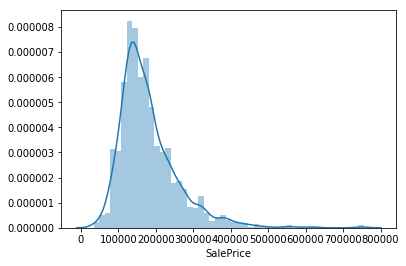

In [6]:
#histogram
sns.distplot(train_df['SalePrice']);

Skew is: 1.8828757597682129


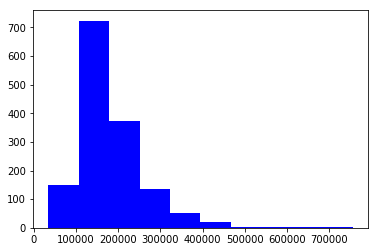

In [7]:
# Now we plot a histogram of SalePrice, showing the skew magnitude. 
# This allows us to get a feel for the distribution of the data.

print ("Skew is:", train_df.SalePrice.skew())
plt.hist(train_df.SalePrice, color='blue')
plt.show()


 Skew is: 0.12133506220520406


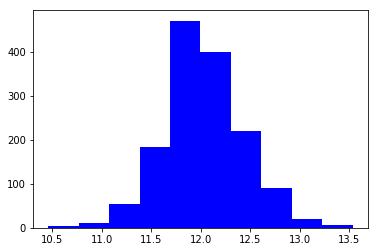

In [8]:
# We use np.log() to transform train_df.SalePrice and calculate the skewness, as well as plot the data, a second time.
# This allows for a much more 'normal' looking distribution of data
target = np.log(train_df.SalePrice)
print ("\n Skew is:", target.skew())
plt.hist(target, color='blue')
plt.show()

#### Sale Price relationship with numerical variables
Lets have a look as too how Sale Price interact with numerical variables; is there some linearity ?

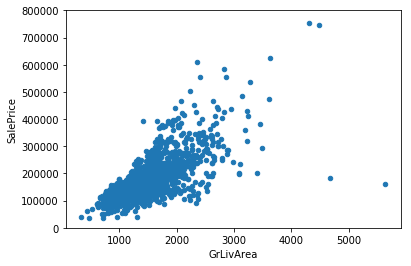

In [9]:
# scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [10]:
# scatter plot TotalBsmtSF/saleprice
var = 'TotalBsmtSF'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [11]:
# scatter plot LotFrontage/saleprice
var = 'LotFrontage'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [12]:
# scatter plot LotArea/saleprice
var = 'LotArea'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [13]:
# scatter plot MasVnrArea/saleprice
var = 'MasVnrArea'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

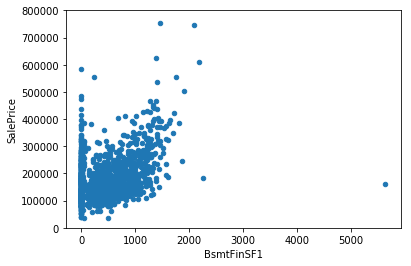

In [14]:
# scatter plot BsmtFinSF1/saleprice
var = 'BsmtFinSF1'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

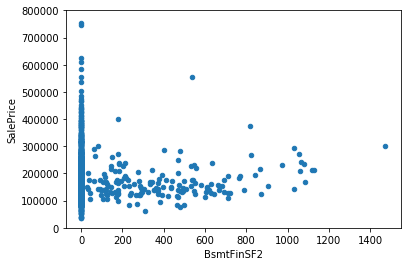

In [15]:
# scatter plot BsmtFinSF2/saleprice
var = 'BsmtFinSF2'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

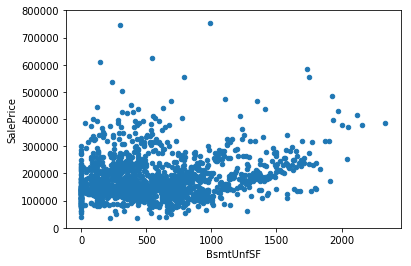

In [16]:
# scatter plot BsmtUnfSF/saleprice
var = 'BsmtUnfSF'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

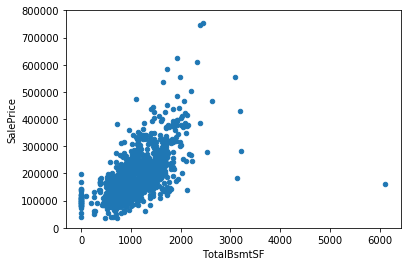

In [17]:
# scatter plot TotalBsmtSF/saleprice
var = 'TotalBsmtSF'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

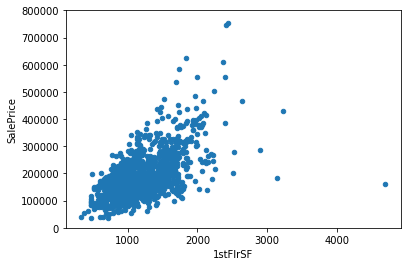

In [18]:
# scatter plot 1stFlrSF/saleprice
var = '1stFlrSF'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

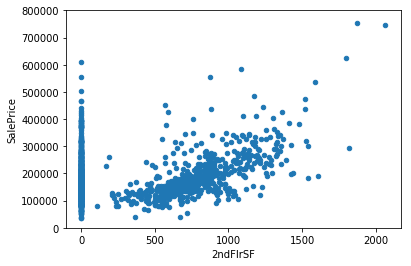

In [19]:
# scatter plot 2ndFlrSF/saleprice
var = '2ndFlrSF'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

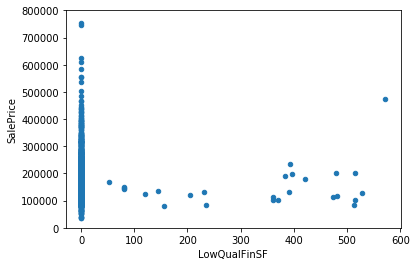

In [20]:
# scatter plot LowQualFinSF/saleprice
var = 'LowQualFinSF'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

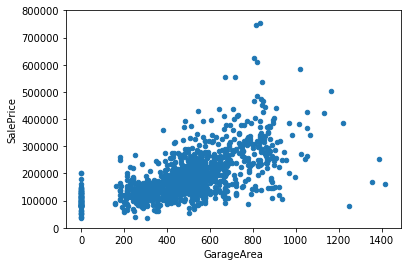

In [21]:
# scatter plot GarageArea/saleprice
var = 'GarageArea'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

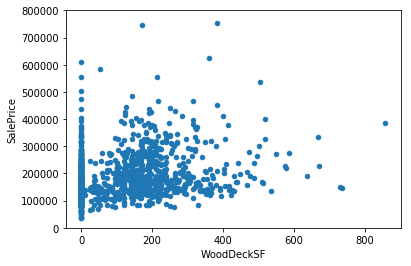

In [22]:
# scatter plot WoodDeckSF/saleprice
var = 'WoodDeckSF'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

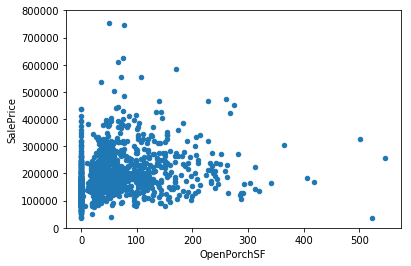

In [23]:
# scatter plot OpenPorchSF/saleprice
var = 'OpenPorchSF'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

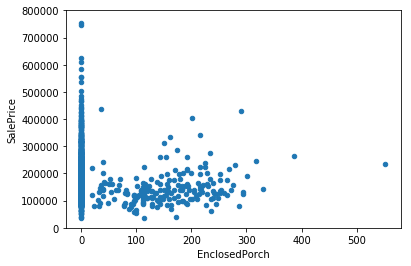

In [24]:
# scatter plot EnclosedPorch/saleprice
var = 'EnclosedPorch'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

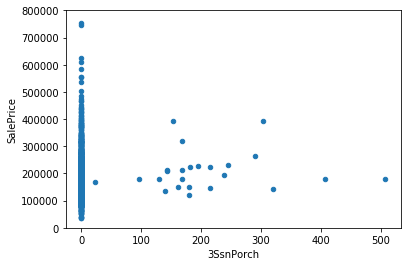

In [25]:
# scatter plot 3SsnPorch/saleprice
var = '3SsnPorch'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

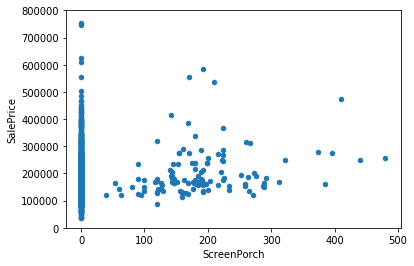

In [26]:
# scatter plot ScreenPorch/saleprice
var = 'ScreenPorch'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

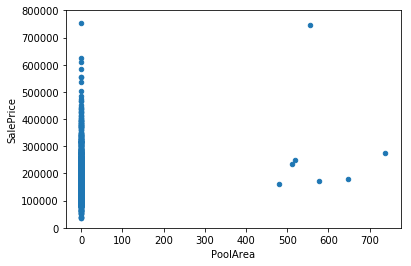

In [27]:
# scatter plot PoolArea/saleprice
var = 'PoolArea'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

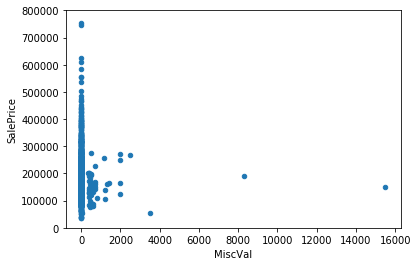

In [28]:
# scatter plot MiscVal/saleprice
var = 'MiscVal'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

#### Sale Price Relationship with categorical features
Lets find out how the relationship between Sale Price and Categorical variables is; is it increasing ? or maybe might be decreasing ? 

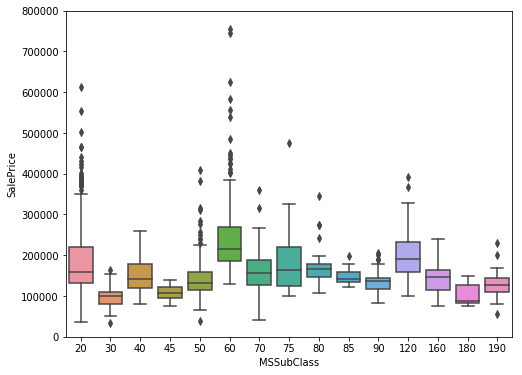

In [29]:
#box plot MSSubClass/saleprice
var = 'MSSubClass'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

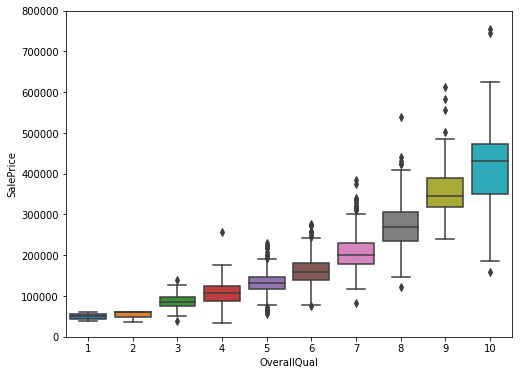

In [30]:
#box plot OverallQual/saleprice
var = 'OverallQual'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

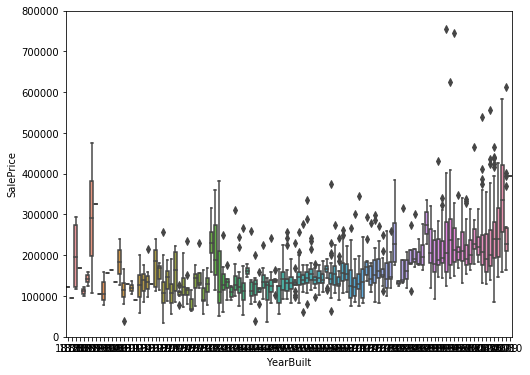

In [31]:
#box plot YearBuilt/saleprice
var = 'YearBuilt'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

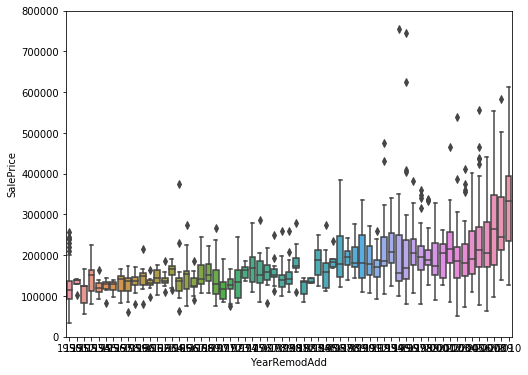

In [32]:
#box plot YearRemodAdd/saleprice
var = 'YearRemodAdd'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

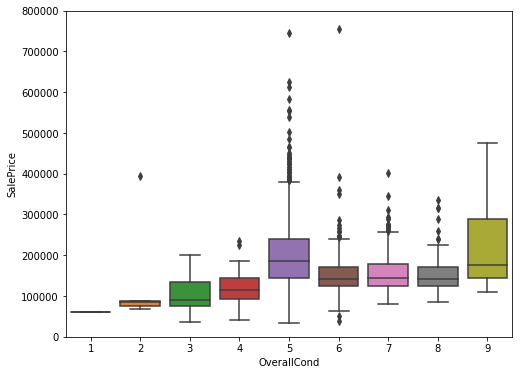

In [33]:
#box plot OverallCond/saleprice
var = 'OverallCond'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

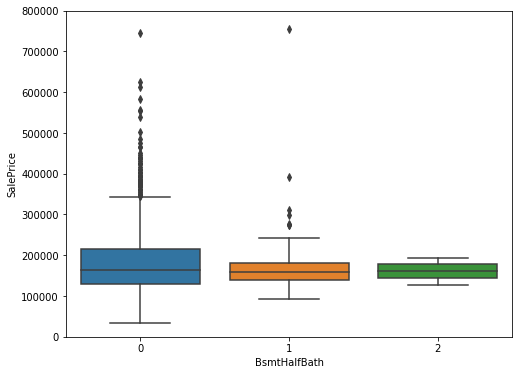

In [34]:
#box plot BsmtHalfBath/saleprice
var = 'BsmtHalfBath'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

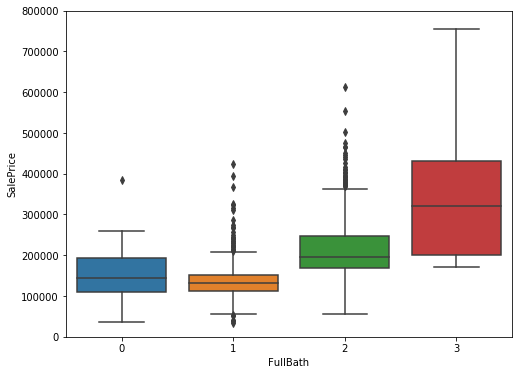

In [35]:
#box plot FullBath/saleprice
var = 'FullBath'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

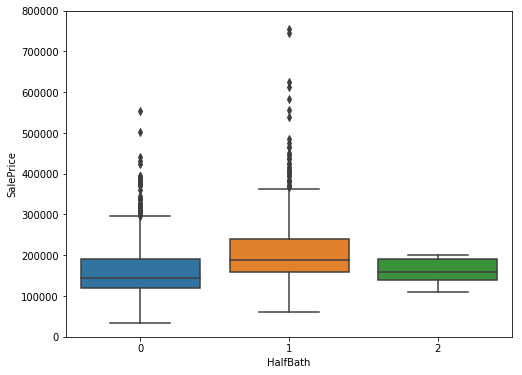

In [36]:
#box plot HalfBath/saleprice
var = 'HalfBath'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

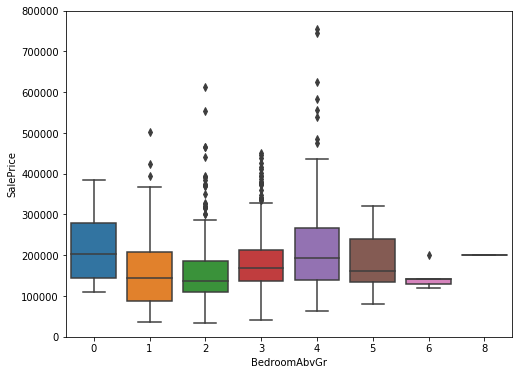

In [37]:
#box plot BedroomAbvGr/saleprice
var = 'BedroomAbvGr'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

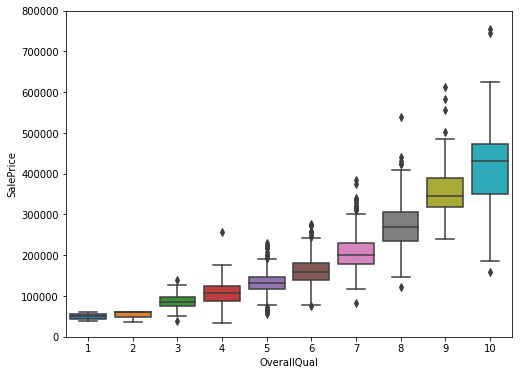

In [38]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

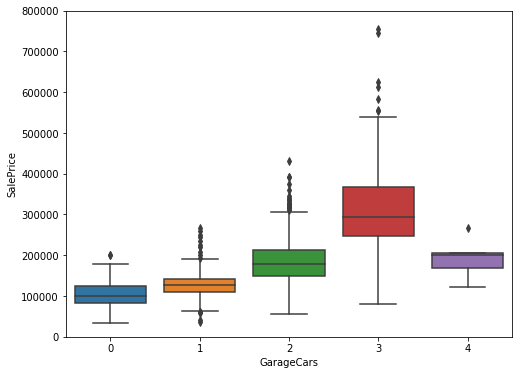

In [39]:
#box plot GarageCars/saleprice
var = 'GarageCars'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

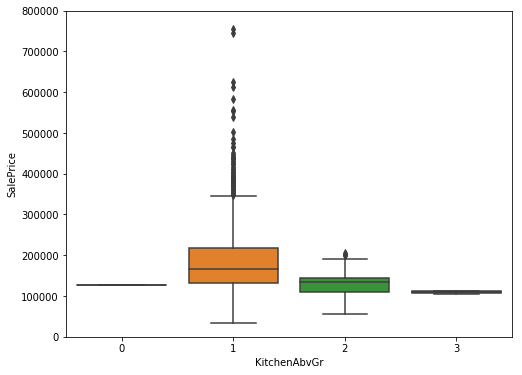

In [40]:
#box plot KitchenAbvGr/saleprice
var = 'KitchenAbvGr'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

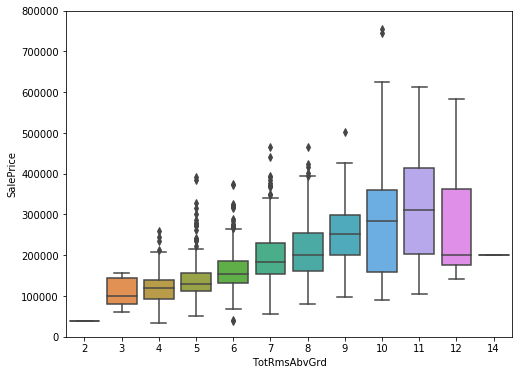

In [41]:
#box plot TotRmsAbvGrd/saleprice
var = 'TotRmsAbvGrd'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

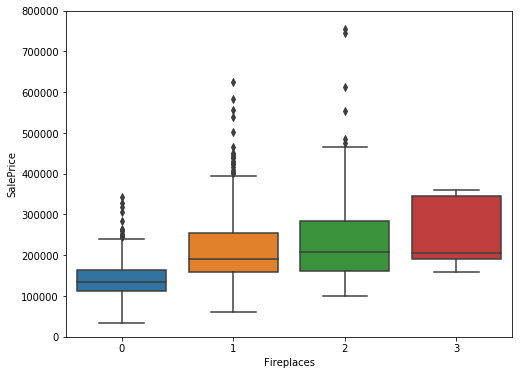

In [42]:
#box plot Fireplaces/saleprice
var = 'Fireplaces'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

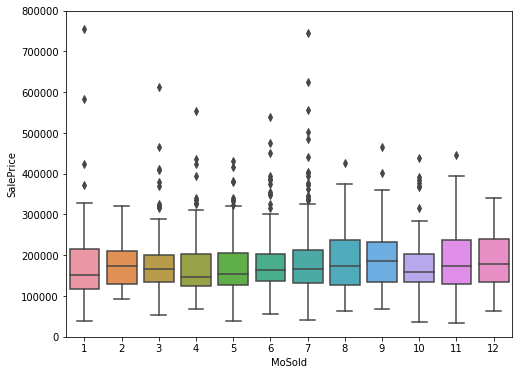

In [43]:
#box plot MoSold/saleprice
var = 'MoSold'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

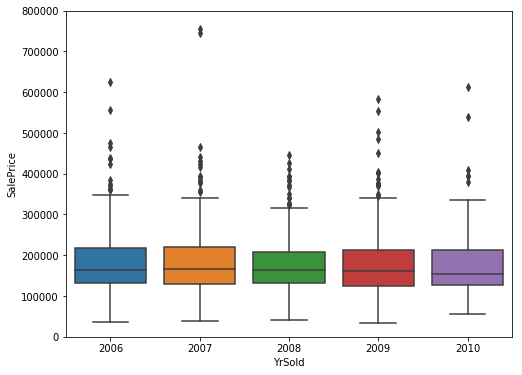

In [44]:
#box plot YrSold/saleprice
var = 'YrSold'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

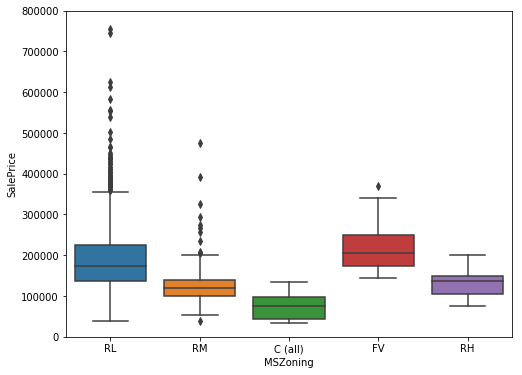

In [45]:
#box plot MSZoning/saleprice
var = 'MSZoning'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

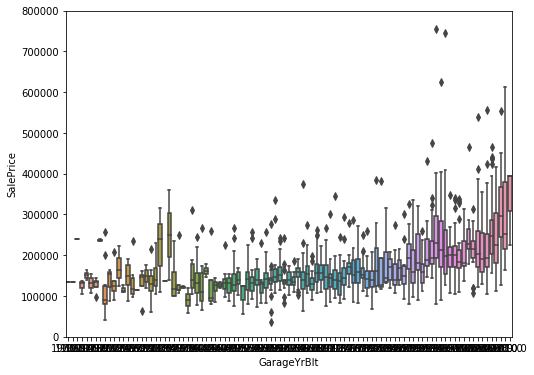

In [46]:
#box plot GarageYrBlt/saleprice
var = 'GarageYrBlt'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

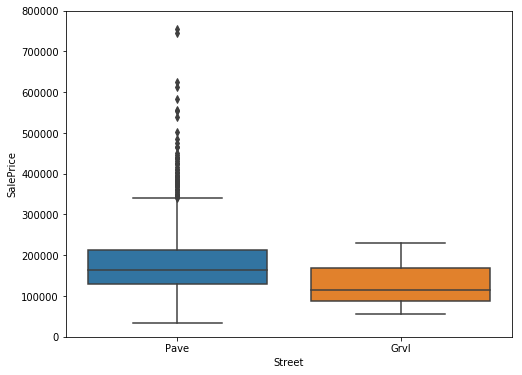

In [47]:
#box plot Street/saleprice
var = 'Street'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

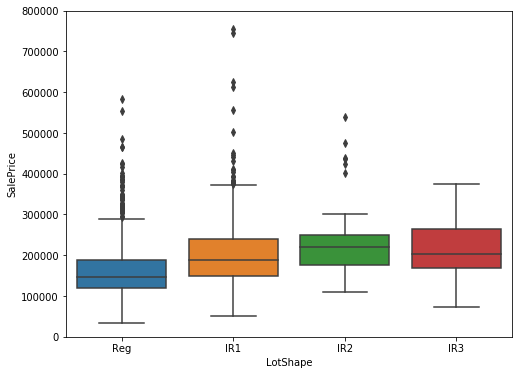

In [48]:
#box plot LotShape/saleprice
var = 'LotShape'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

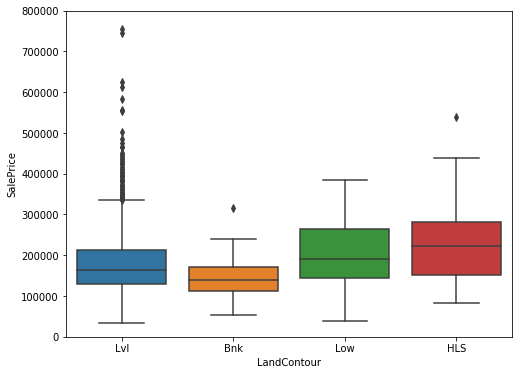

In [49]:
#box plot LandContour/saleprice
var = 'LandContour'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

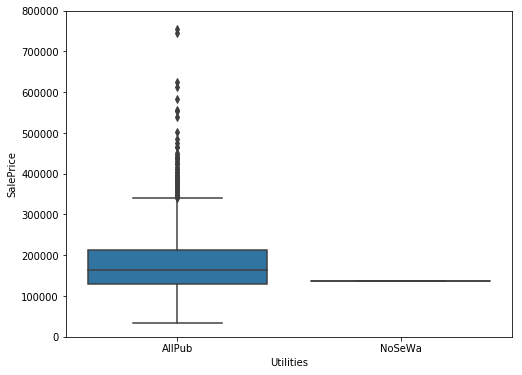

In [50]:
#box plot Utilities/saleprice
var = 'Utilities'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

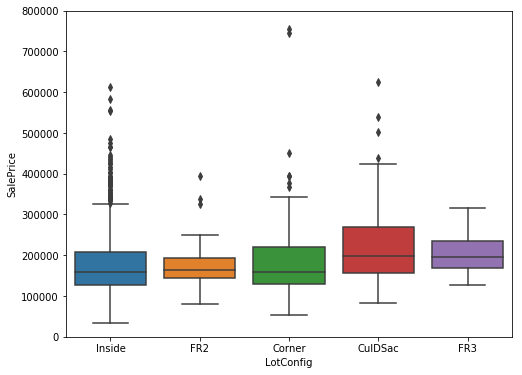

In [51]:
#box plot LotConfig/saleprice
var = 'LotConfig'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

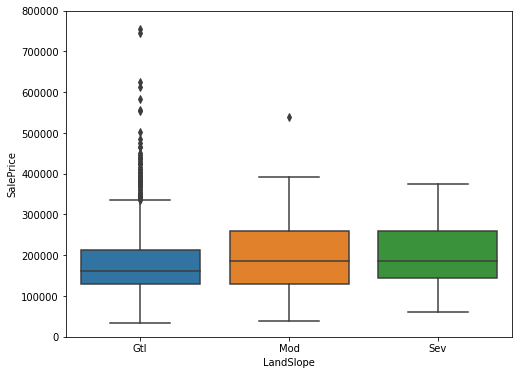

In [52]:
#box plot LandSlope/saleprice
var = 'LandSlope'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

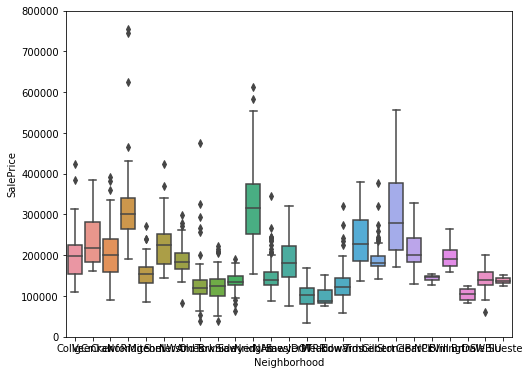

In [53]:
#box plot Neighborhood/saleprice
var = 'Neighborhood'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

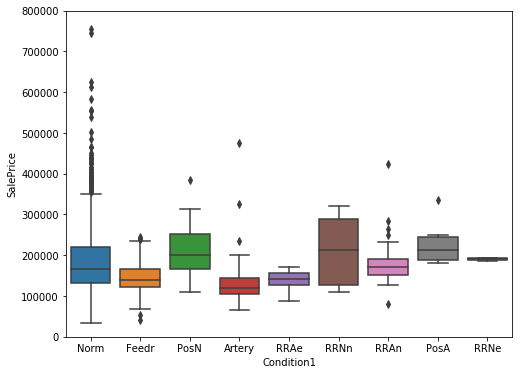

In [54]:
#box plot Condition1/saleprice
var = 'Condition1'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

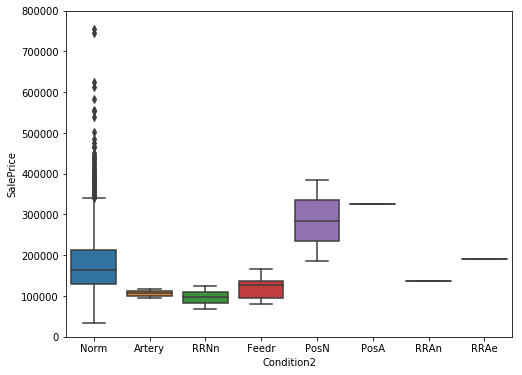

In [55]:
#box plot Condition2/saleprice
var = 'Condition2'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

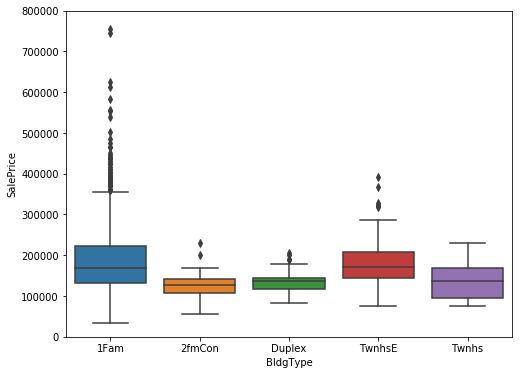

In [56]:
#box plot BldgType/saleprice
var = 'BldgType'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

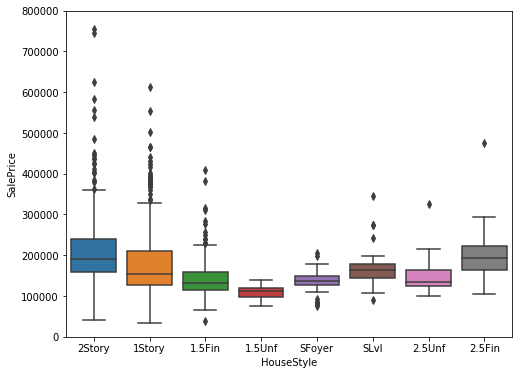

In [57]:
#box plot HouseStyle/saleprice
var = 'HouseStyle'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

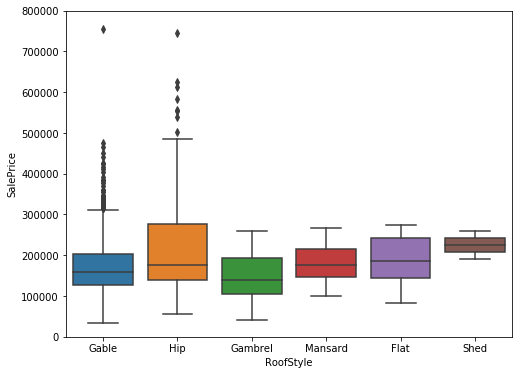

In [58]:
#box plot RoofStyle/saleprice
var = 'RoofStyle'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

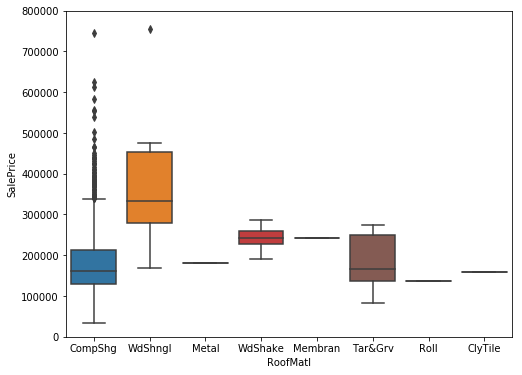

In [59]:
#box plot RoofMatl/saleprice
var = 'RoofMatl'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

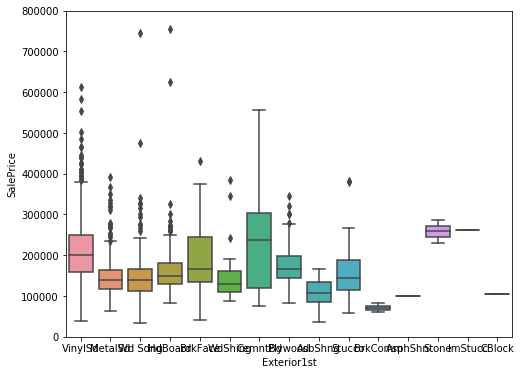

In [60]:
#box plot Exterior1st/saleprice
var = 'Exterior1st'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

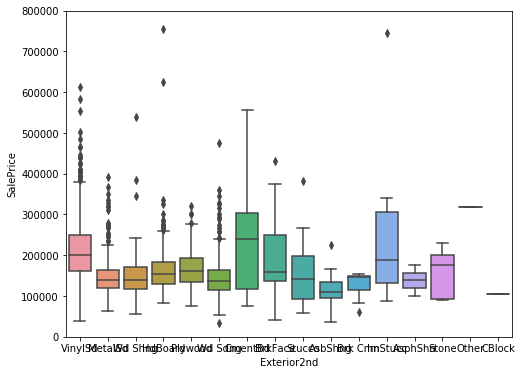

In [61]:
#box plot Exterior2nd/saleprice
var = 'Exterior2nd'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

In [62]:
#box plot MasVnrType/saleprice
var = 'MasVnrType'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

In [63]:
#box plot ExterQual/saleprice
var = 'ExterQual'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

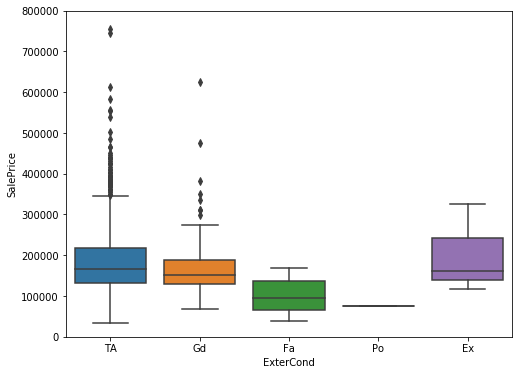

In [64]:
#box plot ExterCond/saleprice
var = 'ExterCond'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

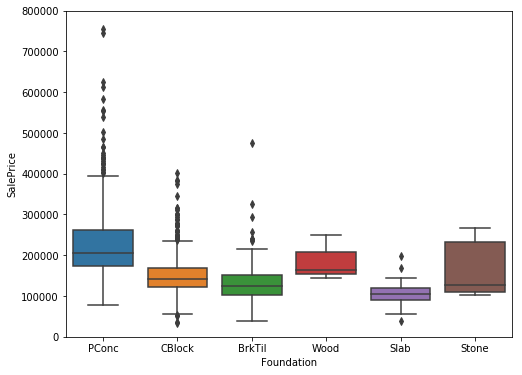

In [65]:
#box plot Foundation/saleprice
var = 'Foundation'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

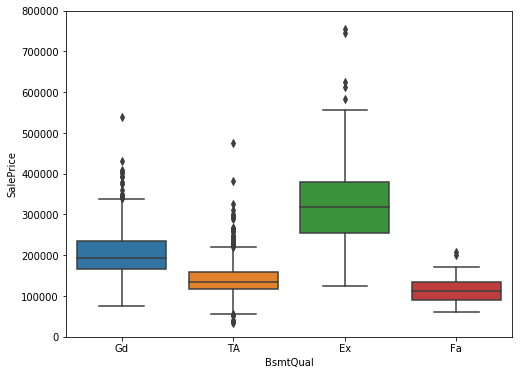

In [66]:
#box plot BsmtQual/saleprice
var = 'BsmtQual'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

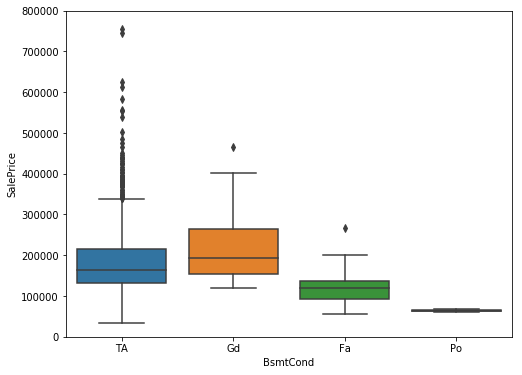

In [67]:
#box plot BsmtCond/saleprice
var = 'BsmtCond'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

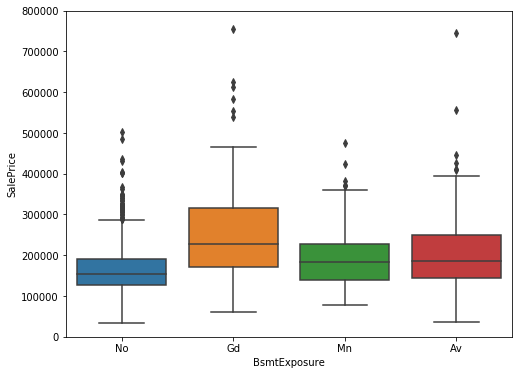

In [68]:
#box plot BsmtExposure/saleprice
var = 'BsmtExposure'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

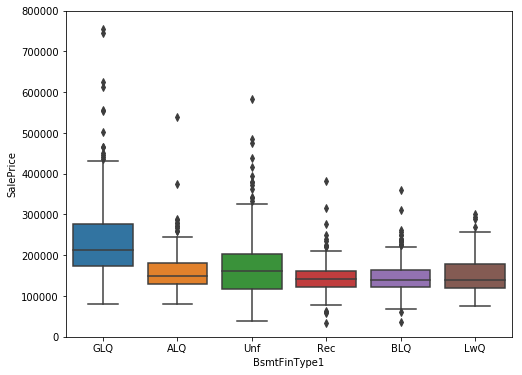

In [69]:
#box plot BsmtFinType1/saleprice
var = 'BsmtFinType1'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

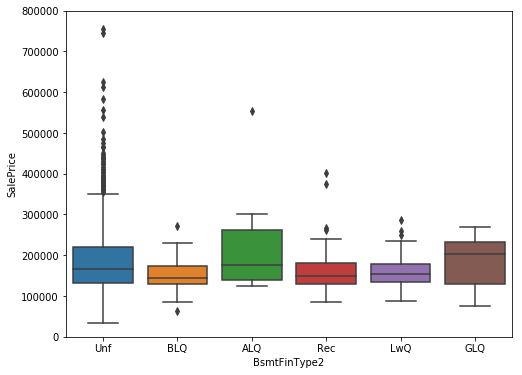

In [70]:
#box plot BsmtFinType2/saleprice
var = 'BsmtFinType2'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

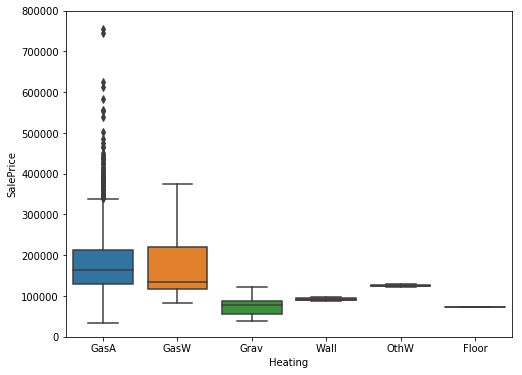

In [71]:
#box plot Heating/saleprice
var = 'Heating'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

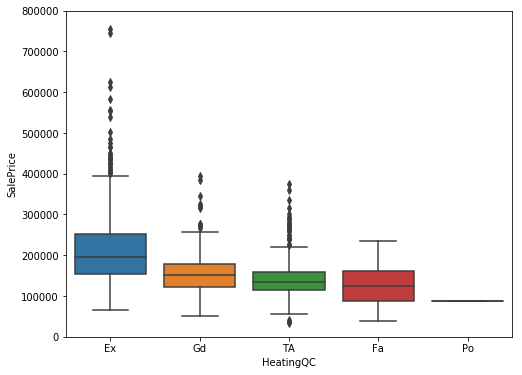

In [72]:
#box plot HeatingQC/saleprice
var = 'HeatingQC'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

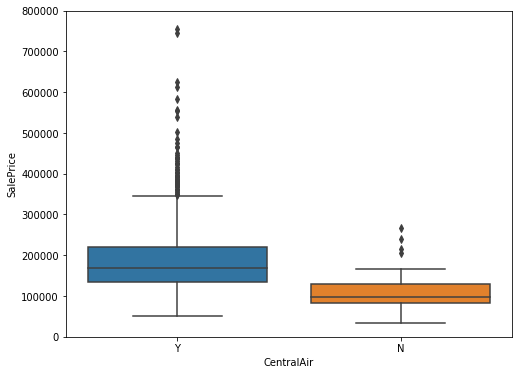

In [73]:
#box plot CentralAir/saleprice
var = 'CentralAir'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

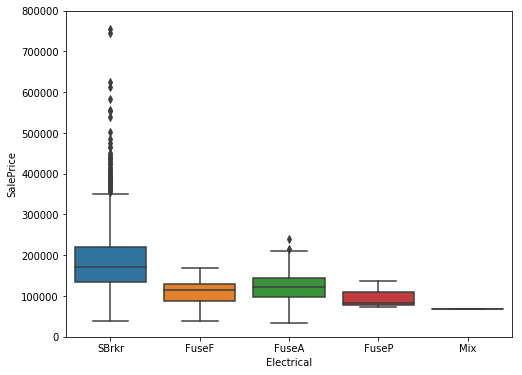

In [74]:
#box plot Electrical/saleprice
var = 'Electrical'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

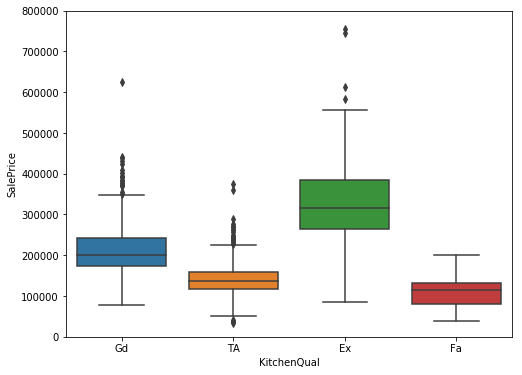

In [75]:
#box plot KitchenQual/saleprice
var = 'KitchenQual'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

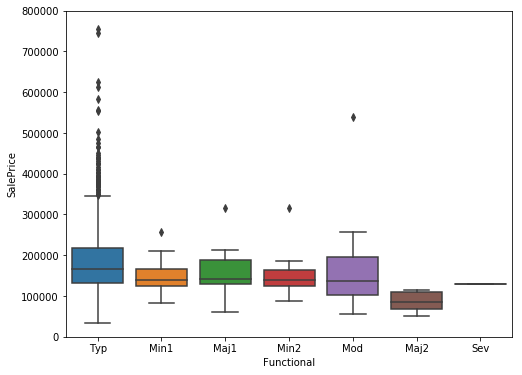

In [76]:
#box plot Functional/saleprice
var = 'Functional'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

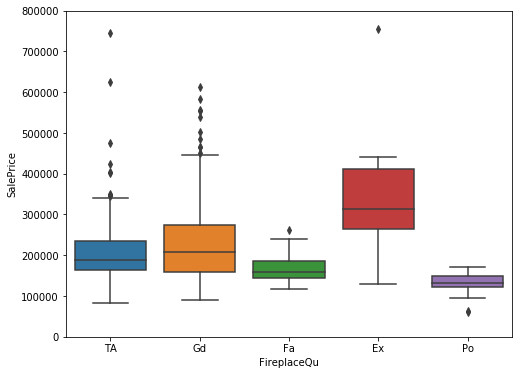

In [77]:
#box plot FireplaceQu/saleprice
var = 'FireplaceQu'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

In [78]:
#box plot GarageType/saleprice
var = 'GarageType'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

In [79]:
#box plot GarageFinish/saleprice
var = 'GarageFinish'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

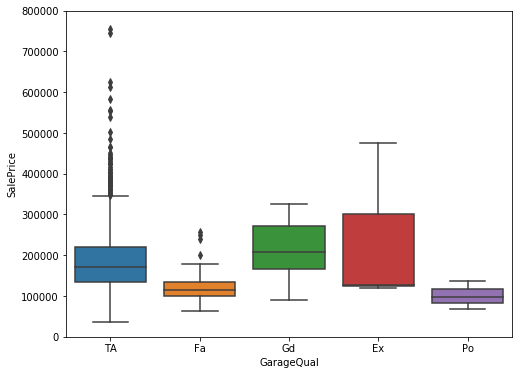

In [80]:
#box plot GarageQual/saleprice
var = 'GarageQual'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

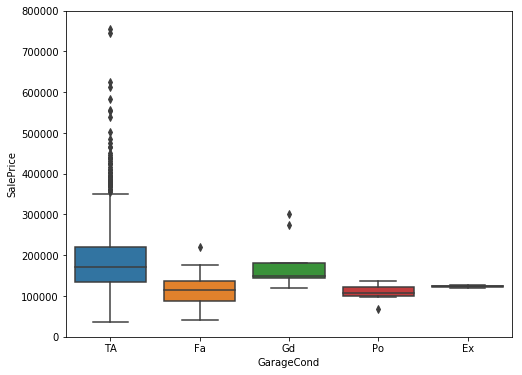

In [81]:
#box plot GarageCond/saleprice
var = 'GarageCond'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

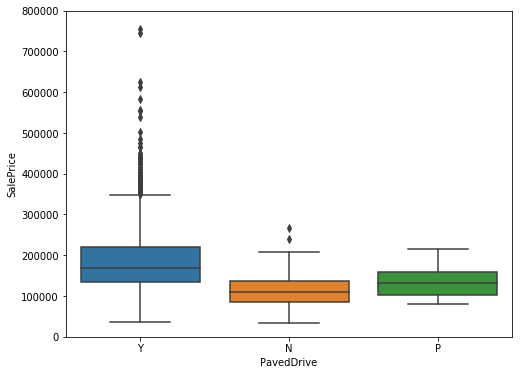

In [82]:
#box plot PavedDrive/saleprice
var = 'PavedDrive'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

In [83]:
#box plot SaleType/saleprice
var = 'SaleType'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

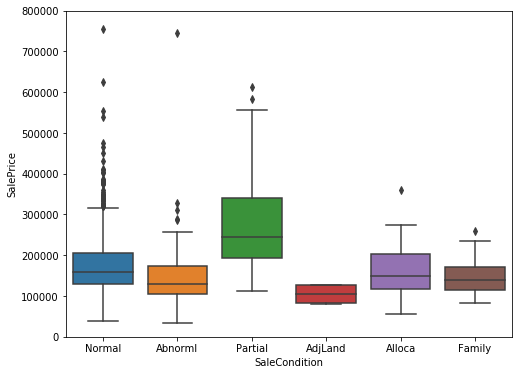

In [84]:
#box plot SaleCondition/saleprice
var = 'SaleCondition'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

#### Correlation matrix (heatmap style)
This heatmap is the best way to get a quick overview of our features and its relationships.

In [85]:
#correlation matrix
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

#### 'SalePrice' correlation matrix (zoomed heatmap style)
these are the variables most correlated with 'SalePrice'

In [86]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=1.0)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

#### multicollinearity
'GarageCars' and 'GarageArea' are like twin brothers. You'll never be able to distinguish them. Therefore, we just need one of these variables in our analysis (we can keep 'GarageCars' since its correlation with 'SalePrice' is higher).

In [87]:
import statsmodels.formula.api as smf

In [88]:
reg = smf.ols(formula = "GarageArea ~ GrLivArea", data = train_df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             GarageArea   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     411.1
Date:                Fri, 31 May 2019   Prob (F-statistic):           1.00e-80
Time:                        08:41:04   Log-Likelihood:                -9722.8
No. Observations:                1460   AIC:                         1.945e+04
Df Residuals:                    1458   BIC:                         1.946e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    183.7943     15.095     12.176      0.000     154.185     213.404
GrLivArea      0.1908      0.009     20.276      0.000       0.172       0.209
==============================================================================
Omnibus:                       54.525   Durbin-Watson:                   1.897
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.990
Skew:                           0.020   Prob(JB):                     3.64e-34
Kurtosis:                       4.591   Cond. No.                     4.90e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

'TotalBsmtSF' and '1stFloor' also seem to be twin brothers. We can keep 'TotalBsmtSF'

In [89]:
train_df.rename({'1stFlrSF':'FirstFlrSF'}, axis=1, inplace=True)

In [90]:
reg = smf.ols(formula = "TotalBsmtSF ~ FirstFlrSF", data = train_df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            TotalBsmtSF   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     2982.
Date:                Fri, 31 May 2019   Prob (F-statistic):               0.00
Time:                        08:41:04   Log-Likelihood:                -10141.
No. Observations:                1460   AIC:                         2.029e+04
Df Residuals:                    1458   BIC:                         2.030e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -23.8301     20.865     -1.142      0.254     -64.759      17.099
FirstFlrSF     0.9300      0.017     54.609      0.000       0.897       0.963
==============================================================================
Omnibus:                      875.186   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14225.149
Skew:                          -2.479   Prob(JB):                         0.00
Kurtosis:                      17.466   Cond. No.                     3.88e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [91]:
train_df.rename({'FirstFlrSF':'1stFlrSF'}, axis=1, inplace=True)

#### Scatter plots between 'SalePrice' and correlated variables
this mega scatter plot gives us a reasonable idea about variables relationships.

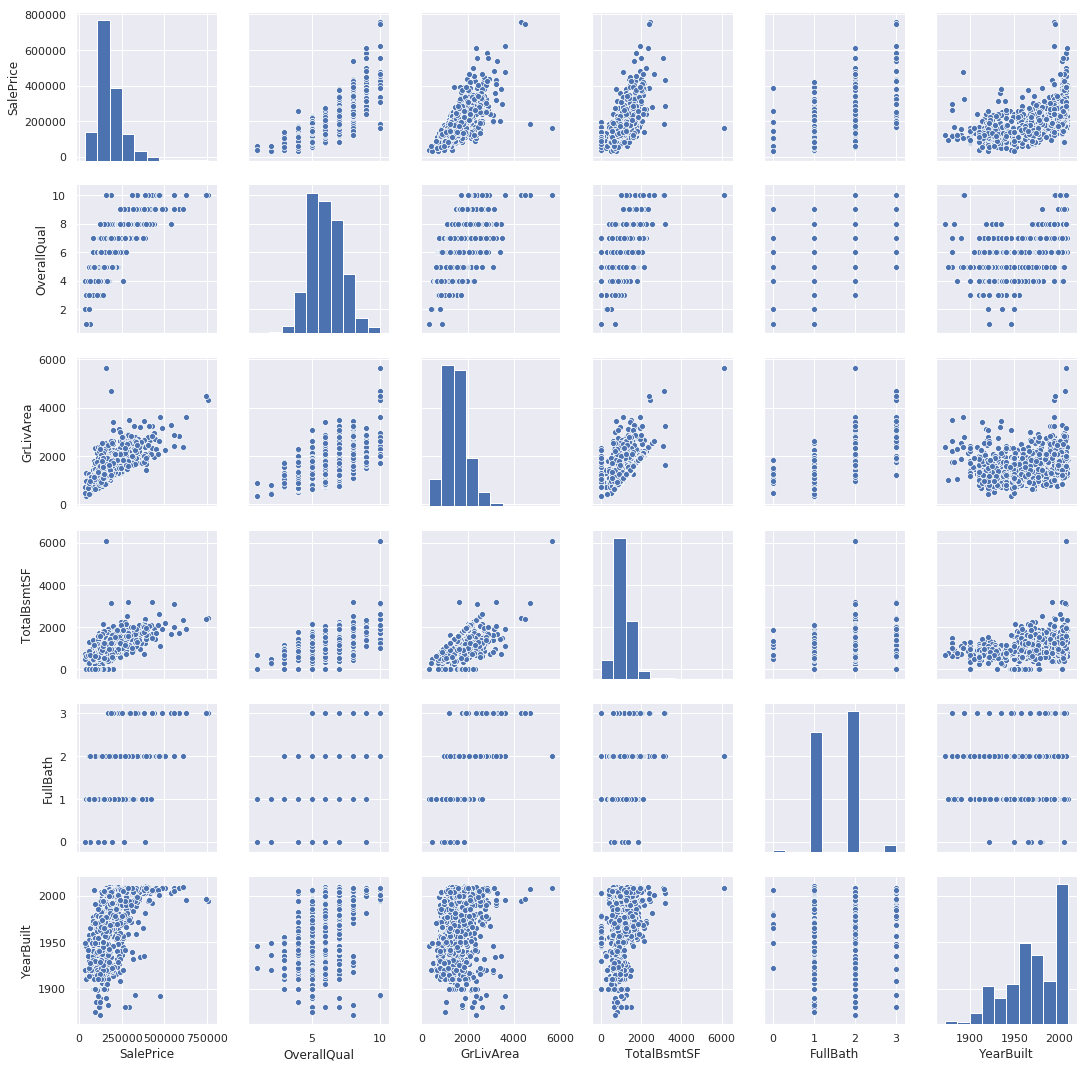

In [92]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train_df[cols], size = 2.5)
plt.show();

##  Part 3: Basic data cleaning

#### A. Dealing with data types

- There are three main data types:
   - Numeric, e.g. MasVnrArea, LotFrontage, LotArea
   - Categorical, e.g MSZoning, Street, Alley
   - Ordinal (MSSubClass, OverallCond, OverallQual) 
   
- Models can only handle numeric features
  - Changing the three Ordinal variables into categorical variables 

- Must convert categorical features into numeric features
   - Create dummy features
   - Transform a categorical feature into a set of dummy features, each representing a unique category
   - In the set of dummy features, 1 indicates that the observation belongs to that category


#### B.  Handling missing data
- Models can not handle missing data

- Simplest solution
  - Remove observations/features that have missing data
        - Removed Columns [Alley, Pool QC, Fence, Miscfeature]  too many missing observations
        
- But, removing missing data can introduce a lot of issues
  - Data is randomly missing: potential lose a lot of your data
  - Data is non-randomly missing: in addition to losing data, you are also introducing potential biases
  - Usually, this is a poor solution 
  
- An alternative solution is to use imputation
  - We replaced categorical missing values using the highest frequency value of given feature 
  - When it comes to continuous missing data we used Interpolation to approximate missing values. 


- How prevalent is the missing data?
- Is missing data random or does it have a pattern?

In [93]:
#missing data
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

Total   Percent
PoolQC         1453  0.995205
MiscFeature    1406  0.963014
Alley          1369  0.937671
Fence          1179  0.807534
FireplaceQu     690  0.472603
LotFrontage     259  0.177397
GarageType       81  0.055479
GarageCond       81  0.055479
GarageFinish     81  0.055479
GarageQual       81  0.055479
GarageYrBlt      81  0.055479
BsmtFinType2     38  0.026027
BsmtExposure     38  0.026027
BsmtQual         37  0.025342
BsmtCond         37  0.025342
BsmtFinType1     37  0.025342
MasVnrArea        8  0.005479
MasVnrType        8  0.005479
Electrical        1  0.000685
RoofMatl          0  0.000000

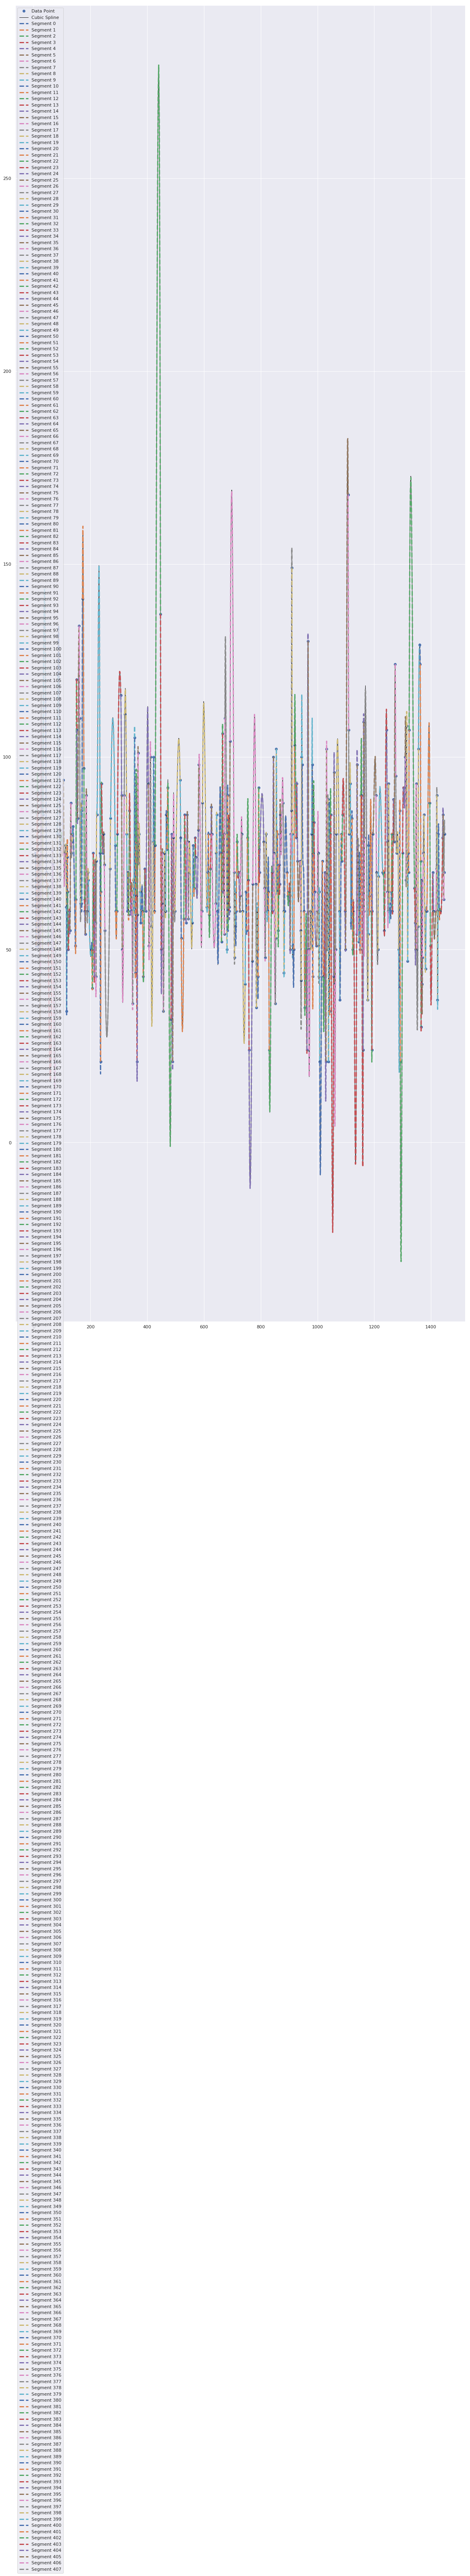

In [94]:
# LotFrontage : interpolation
# LotFrontage
# I am generating a graph of a cubic spline through a given set of data points:
# I would drop the values associated with NaN values and develop a model for the remaining value pairs and then predict over all x. Like so:
from scipy import interpolate
# Create data with missing y values
x = np.array([7,9,12,14,16,18,24,26,31,33,42,45,50,52,64,66,68,76,78,84,86,95,97,100,102,104,106,111,113,115,116,118,120,
    122,126,128,131,133,135,136,138,147,149,151,152,155,160,162,166,168,169,172,177,179,180,182,186,188,191,193,
    203,205,207,210,214,216,218,220,221,223,234,236,237,239,244,246,249,251,269,271,287,289,293,295,307,310,312,
     319,321,328,330,332,335,337,342,344,346,349,351,353,356,358,360,363,364,366,368,369,371,375,377,384,386,392,
     395,404,406,412,414,421,423,426,428,447,449,452,454,457,461,465,467,470,472,484,486,490,492,496,498,516,518,
    520,529,532,537,541,543,545,547,559,562,564,566,569,571,580,582,593,595,610,614,616,618,623,625,626,628,641,643,
    645,647,660,662,666,668,670,672,674,679,681,682,684,685,687,689,690,692,706,708,709,711,714,716,720,723,726,728,
     734,736,745,748,751,753,757,759,770,772,783,785,787,789,791,793,794,796,811,813,816,819,822,824,828,830,840,842,
     845,847,851,853,855,858,859,861,865,867,868,870,879,881,882,884,893,895,900,902,904,906,908,910,911,913,917,919,
    925,927,930,939,941,943,944,946,953,955,961,963,967,969,975,977,980,982,983,985,988,990,996,999,1003,1005,1006,1008,
    1017,1020,1024,1026,1030,1032,1035,1037,1039,1041,1043,1045,1047,1057,1059,1060,1064,1066,1077,1079,1084,1086,1088,
    1097,1099,1108,1110,1112,1116,1118,1122,1124,1126,1138,1140,1141,1143,1145,1146,1148,1150,1153,1156,1161,1163,1164,
    1166,1177,1179,1180,1182,1190,1192,1193,1195,1206,1208,1213,1215,1230,1232,1233,1235,1244,1246,1247,1249,1251,1253,
    1255,1260,1262,1264,1268,1270,1274,1276,1279,1286,1289,1290,1292,1300,1303,1309,1311,1312,1314,1318,1320,1321,1323,
    1342,1344,1346,1348,1350,1354,1356,1360,1362,1364,1365,1367,1368,1370,1373,1375,1381,1383,1385,1396,1398,1407,1409,
     1417,1419,1421,1423,1426,1429,1431,1433,1441,1443,1445,1446,1448])
y = np.array([75.0,51.0,85.0,91.0,51.0,72.0,44.0,110.0,50.0,85.0,115.0,70.0,66.0,52.0,50.0,76.0,72.0,21.0,50.0,80.0,121.0,
     69.0,78.0,77.0,77.0,94.0,75.0,75.0,77.0,61.0,34.0,74.0,65.0,50.0,60.0,55.0,88.0,75.0,78.0,80.0,82.0,51.0,63.0,
     120.0,107.0,84.0,134.0,110.0,62.0,86.0,62.0,141.0,97.0,63.0,60.0,54.0,90.0,60.0,70.0,68.0,50.0,50.0,40.0,75.0,
     43.0,72.0,57.0,43.0,73.0,85.0,75.0,21.0,65.0,93.0,75.0,80.0,72.0,55.0,71.0,84.0,77.0,60.0,60.0,80.0,116.0,90.0,
     50.0,90.0,111.0,80.0,60.0,70.0,59.0,86.0,60.0,63.0,65.0,36.0,68.0,60.0,105.0,44.0,78.0,64.0,21.0,59.0,101.0,78.0,
     80.0,65.0,57.0,60.0,43.0,71.0,60.0,93.0,51.0,100.0,56.0,78.0,100.0,60.0,77.0,137.0,50.0,62.0,75.0,34.0,75.0,60.0,
    85.0,76.0,92.0,32.0,80.0,21.0,79.0,60.0,60.0,94.0,79.0,53.0, 58.0,85.0,57.0,85.0,78.0,58.0,70.0,57.0,77.0,66.0,66.0,
    79.0,74.0,81.0,98.0,60.0,88.0,61.0,70.0,80.0,59.0,71.0,80.0,87.0,80.0,62.0,75.0,85.0,60.0,75.0,52.0,106.0,65.0,80.0,
    54.0,110.0,80.0,50.0,55.0,90.0,58.0,84.0,60.0,61.0,104.0,70.0,48.0,65.0,56.0,60.0,78.0,69.0,70.0,60.0,64.0,80.0,60.0,
    41.0,65.0,55.0,79.0,68.0,24.0,47.0,67.0,67.0,35.0,60.0,50.0,43.0,92.0,76.0,70.0,78.0,66.0,48.0,80.0,60.0,60.0,65.0,24.0,
    70.0,60.0,100.0,75.0,36.0,53.0,102.0,65.0,80.0,55.0,72.0,67.0,85.0,80.0,88.0,60.0,44.0,60.0,70.0,64.0,65.0,64.0,50.0,
    80.0,86.0,149.0,80.0,51.0,50.0,103.0,79.0,93.0,73.0,73.0,55.0,42.0,100.0,98.0,60.0,35.0,50.0,24.0,130.0,50.0,60.0,51.0,
    80.0,98.0,43.0,75.0,83.0,65.0,51.0,60.0,75.0,43.0,65.0,21.0,73.0,43.0,43.0,70.0,21.0,102.0,50.0,89.0,21.0,88.0,34.0,80.0,
    85.0,43.0,96.0,41.0,50.0,80.0,60.0,37.0,80.0,73.0,85.0,60.0,50.0,168.0,107.0,80.0,93.0,57.0,84.0,50.0,60.0,54.0,98.0,
    60.0,77.0,60.0,52.0,75.0,50.0,90.0,90.0,24.0,109.0,60.0,79.0,37.0,54.0,77.0,64.0,60.0,24.0,60.0,80.0,90.0,70.0,50.0,69.0,
    70.0,70.0,70.0,55.0,107.0,78.0,65.0,60.0,93.0,62.0,60.0,65.0,80.0,60.0,89.0,78.0,124.0,95.0,75.0,50.0,40.0,86.0,21.0,75.0,
    92.0,100.0,100.0,68.0,108.0,47.0,75.0,70.0,107.0,66.0,57.0,50.0,93.0,50.0,56.0,102.0,129.0,124.0,73.0,30.0,68.0,41.0,48.0,
    75.0,85.0,45.0,60.0,60.0,88.0,51.0,70.0,60.0,60.0,71.0,90.0,37.0,80.0,60.0,60.0,60.0,79.0,85.0,63.0,70.0,80.0])
arr = np.arange(np.amin(x), np.amax(x), 1)
s = interpolate.CubicSpline(x,y)

fig, ax = plt.subplots(figsize=(20, 60))
ax.plot(x, y, 'bo', label='Data Point')
ax.plot(arr, s(arr), 'k-', label='Cubic Spline', lw=1)

for i in range(x.shape[0] - 1):
    segment_x = np.linspace(x[i], x[i + 1], 10)
    # A (4, 100) array, where the rows contain (x-x[i])**3, (x-x[i])**2 etc.
    exp_x = (segment_x - x[i])[None, :] ** np.arange(4)[::-1, None]
    # Sum over the rows of exp_x weighted by coefficients in the ith column of s.c
    segment_y = s.c[:, i].dot(exp_x)
    ax.plot(segment_x, segment_y, label='Segment {}'.format(i), ls='--', lw=3)

ax.legend()
plt.show()

In [95]:
# LotFrontage
from scipy.interpolate import CubicSpline

# calculate natural cubic spline polynomials
cs = CubicSpline(x,y,bc_type='natural')

# show values of interpolation function at x missing
print('S(8) = ', cs(8))
print('S(13) = ', cs(13))
print('S(15) = ', cs(15))
print('S(17) = ', cs(17))
print('S(25) = ', cs(25))
print('S(32) = ', cs(32))
print('S(43) = ', cs(43))
print('S(44) = ', cs(44))
print('S(51) = ', cs(51))
print('S(65) = ', cs(65))
print('S(67) = ', cs(67))
print('S(77) = ', cs(77))
print('S(85) = ', cs(85))
print('S(96) = ', cs(96))
print('S(101) = ', cs(101))
print('S(105) = ', cs(105))
print('S(112) = ', cs(112))
print('S(114) = ', cs(114))
print('S(117) = ', cs(117))
print('S(121) = ', cs(121))
print('S(127) = ', cs(127))
print('S(132) = ', cs(132))
print('S(134) = ', cs(134))
print('S(137) = ', cs(137))
print('S(148) = ', cs(148))
print('S(150) = ', cs(150))
print('S(153) = ', cs(153))
print('S(154) = ', cs(154))
print('S(161) = ', cs(161))
print('S(167) = ', cs(167))
print('S(170) = ', cs(170))
print('S(171) = ', cs(171))
print('S(178) = ', cs(178))
print('S(181) = ', cs(181))
print('S(187) = ', cs(187))
print('S(192) = ', cs(192))
print('S(204) = ', cs(204))
print('S(208) = ', cs(208))
print('S(209) = ', cs(209))
print('S(215) = ', cs(215))
print('S(219) = ', cs(219))
print('S(222) = ', cs(222))
print('S(235) = ', cs(235))
print('S(238) = ', cs(238))
print('S(245) = ', cs(245))
print('S(250) = ', cs(250))
print('S(270) = ', cs(270))
print('S(288) = ', cs(288))
print('S(289) = ', cs(289))
print('S(294) = ', cs(294))
print('S(308) = ', cs(308))
print('S(309) = ', cs(309))
print('S(311) = ', cs(311))
print('S(320) = ', cs(320))
print('S(329) = ', cs(329))
print('S(331) = ', cs(331))
print('S(336) = ', cs(336))
print('S(343) = ', cs(343))
print('S(347) = ', cs(347))
print('S(348) = ', cs(348))
print('S(352) = ', cs(352))
print('S(357) = ', cs(357))
print('S(361) = ', cs(361))
print('S(362) = ', cs(362))
print('S(365) = ', cs(365))
print('S(367) = ', cs(367))
print('S(370) = ', cs(370))
print('S(371) = ', cs(371))
print('S(376) = ', cs(376))
print('S(385) = ', cs(385))
print('S(393) = ', cs(393))
print('S(394) = ', cs(394))
print('S(405) = ', cs(405))
print('S(406) = ', cs(406))
print('S(413) = ', cs(413))
print('S(422) = ', cs(422))
print('S(427) = ', cs(427))
print('S(448) = ', cs(448))
print('S(453) = ', cs(453))
print('S(458) = ', cs(458))
print('S(459) = ', cs(459))
print('S(460) = ', cs(460))
print('S(466) = ', cs(466))
print('S(471) = ', cs(471))
print('S(485) = ', cs(485))
print('S(491) = ', cs(491))
print('S(497) = ', cs(497))
print('S(517) = ', cs(517))
print('S(519) = ', cs(519))
print('S(530) = ', cs(530))
print('S(538) = ', cs(538))
print('S(539) = ', cs(539))
print('S(540) = ', cs(540))
print('S(542) = ', cs(542))
print('S(546) = ', cs(546))
print('S(560) = ', cs(560))
print('S(561) = ', cs(561))
print('S(565) = ', cs(565))
print('S(570) = ', cs(570))
print('S(581) = ', cs(581))
print('S(594) = ', cs(594))
print('S(611) = ', cs(611))
print('S(612) = ', cs(612))
print('S(613) = ', cs(613))
print('S(617) = ', cs(617))
print('S(624) = ', cs(624))
print('S(627) = ', cs(627))
print('S(642) = ', cs(642))
print('S(646) = ', cs(646))
print('S(661) = ', cs(661))
print('S(667) = ', cs(667))
print('S(669) = ', cs(669))
print('S(673) = ', cs(673))
print('S(680) = ', cs(680))
print('S(683) = ', cs(683))
print('S(686) = ', cs(686))
print('S(688) = ', cs(688))
print('S(691) = ', cs(691))
print('S(707) = ', cs(707))
print('S(710) = ', cs(710))
print('S(715) = ', cs(715))
print('S(721) = ', cs(721))
print('S(722) = ', cs(722))
print('S(727) = ', cs(727))
print('S(735) = ', cs(735))
print('S(746) = ', cs(746))
print('S(747) = ', cs(747))
print('S(752) = ', cs(752))
print('S(758) = ', cs(758))
print('S(771) = ', cs(771))
print('S(784) = ', cs(784))
print('S(786) = ', cs(786))
print('S(790) = ', cs(790))
print('S(792) = ', cs(792))
print('S(795) = ', cs(795))
print('S(812) = ', cs(812))
print('S(817) = ', cs(817))
print('S(818) = ', cs(818))
print('S(823) = ', cs(823))
print('S(829) = ', cs(829))
print('S(841) = ', cs(841))
print('S(846) = ', cs(846))
print('S(852) = ', cs(852))
print('S(854) = ', cs(854))
print('S(856) = ', cs(856))
print('S(857) = ', cs(857))
print('S(860) = ', cs(860))
print('S(866) = ', cs(866))
print('S(869) = ', cs(869))
print('S(880) = ', cs(880))
print('S(883) = ', cs(883))
print('S(894) = ', cs(894))
print('S(901) = ', cs(901))
print('S(905) = ', cs(905))
print('S(909) = ', cs(909))
print('S(912) = ', cs(912))
print('S(918) = ', cs(918))
print('S(926) = ', cs(926))
print('S(928) = ', cs(928))
print('S(929) = ', cs(929))
print('S(930) = ', cs(930))
print('S(940) = ', cs(940))
print('S(942) = ', cs(942))
print('S(945) = ', cs(945))
print('S(954) = ', cs(954))
print('S(962) = ', cs(962))
print('S(968) = ', cs(968))
print('S(976) = ', cs(976))
print('S(981) = ', cs(981))
print('S(984) = ', cs(984))
print('S(989) = ', cs(989))
print('S(997) = ', cs(997))
print('S(998) = ', cs(998))
print('S(1004) = ', cs(1004))
print('S(1007) = ', cs(1007))
print('S(1018) = ', cs(1018))
print('S(1019) = ', cs(1019))
print('S(1025) = ', cs(1025))
print('S(1031) = ', cs(1031))
print('S(1033) = ', cs(1033))
print('S(1034) = ', cs(1034))
print('S(1036) = ', cs(1036))
print('S(1038) = ', cs(1038))
print('S(1042) = ', cs(1042))
print('S(1046) = ', cs(1046))
print('S(1058) = ', cs(1058))
print('S(1060) = ', cs(1060))
print('S(1065) = ', cs(1065))
print('S(1078) = ', cs(1078))
print('S(1085) = ', cs(1085))
print('S(1087) = ', cs(1087))
print('S(1098) = ', cs(1098))
print('S(1109) = ', cs(1109))
print('S(1111) = ', cs(1111))
print('S(1117) = ', cs(1117))
print('S(1123) = ', cs(1123))
print('S(1125) = ', cs(1125))
print('S(1139) = ', cs(1139))
print('S(1142) = ', cs(1142))
print('S(1144) = ', cs(1144))
print('S(1147) = ', cs(1147))
print('S(1149) = ', cs(1149))
print('S(1154) = ', cs(1154))
print('S(1155) = ', cs(1155))
print('S(1162) = ', cs(1162))
print('S(1165) = ', cs(1165))
print('S(1178) = ', cs(1178))
print('S(1181) = ', cs(1181))
print('S(1191) = ', cs(1191))
print('S(1194) = ', cs(1194))
print('S(1207) = ', cs(1207))
print('S(1214) = ', cs(1214))
print('S(1231) = ', cs(1231))
print('S(1234) = ', cs(1234))
print('S(1245) = ', cs(1245))
print('S(1248) = ', cs(1248))
print('S(1252) = ', cs(1252))
print('S(1254) = ', cs(1254))
print('S(1261) = ', cs(1261))
print('S(1263) = ', cs(1263))
print('S(1269) = ', cs(1269))
print('S(1271) = ', cs(1271))
print('S(1272) = ', cs(1272))
print('S(1273) = ', cs(1273))
print('S(1277) = ', cs(1277))
print('S(1278) = ', cs(1278))
print('S(1287) = ', cs(1287))
print('S(1288) = ', cs(1288))
print('S(1291) = ', cs(1291))
print('S(1301) = ', cs(1301))
print('S(1302) = ', cs(1302))
print('S(1310) = ', cs(1310))
print('S(1313) = ', cs(1313))
print('S(1319) = ', cs(1319))
print('S(1322) = ', cs(1322))
print('S(1343) = ', cs(1343))
print('S(1347) = ', cs(1347))
print('S(1349) = ', cs(1349))
print('S(1355) = ', cs(1355))
print('S(1357) = ', cs(1357))
print('S(1358) = ', cs(1358))
print('S(1359) = ', cs(1359))
print('S(1363) = ', cs(1363))
print('S(1366) = ', cs(1366))
print('S(1369) = ', cs(1369))
print('S(1374) = ', cs(1374))
print('S(1382) = ', cs(1382))
print('S(1384) = ', cs(1384))
print('S(1397) = ', cs(1397))
print('S(1408) = ', cs(1408))
print('S(1418) = ', cs(1418))
print('S(1420) = ', cs(1420))
print('S(1424) = ', cs(1424))
print('S(1425) = ', cs(1425))
print('S(1430) = ', cs(1430))
print('S(1432) = ', cs(1432))
print('S(1442) = ', cs(1442))
print('S(1444) = ', cs(1444))
print('S(1447) = ', cs(1447))

S(8) =  59.14623031825504
S(13) =  95.31372543268462
S(15) =  68.66728824691255
S(17) =  57.89212157966516
S(25) =  78.58097025860567
S(32) =  62.47808925175623
S(43) =  98.69347510368397
S(44) =  82.40248949138807
S(51) =  60.27760969878421
S(65) =  64.93715024879192
S(67) =  77.70708617029202
S(77) =  35.4952025554594
S(85) =  100.72042533152376
S(96) =  72.60559075981368
S(101) =  74.4115397313139
S(105) =  87.15391393785518
S(112) =  76.26783240867843
S(114) =  76.17946347262469
S(117) =  46.928689490070504
S(121) =  54.611565177610025
S(127) =  55.616042740052215
S(132) =  83.00920086821513
S(134) =  74.52872621531353
S(137) =  81.3475780393381
S(148) =  49.40981323280151
S(150) =  97.18572043991956
S(153) =  91.3344712058063
S(154) =  83.47347899221744
S(161) =  126.3488008797197
S(167) =  81.45833968915217
S(170) =  69.42176556049195
S(171) =  104.36659683530348
S(178) =  75.69742049186553
S(181) =  55.31861278265248
S(187) =  75.54980906872437
S(192) =  70.94774134345614
S(204)

In [96]:
# LotFrontage
train_df.at[8,'LotFrontage'] = 59.1
train_df.at[13,'LotFrontage'] = 95.3
train_df.at[15,'LotFrontage'] = 68.6
train_df.at[17,'LotFrontage'] = 57.8
train_df.at[25,'LotFrontage'] = 78.5
train_df.at[32,'LotFrontage'] = 62.4
train_df.at[43,'LotFrontage'] = 98.6
train_df.at[44,'LotFrontage'] = 82.4
train_df.at[51,'LotFrontage'] = 60.2
train_df.at[65,'LotFrontage'] = 64.9
train_df.at[67,'LotFrontage'] = 77.7
train_df.at[77,'LotFrontage'] = 35.4
train_df.at[85,'LotFrontage'] = 100.7
train_df.at[96,'LotFrontage'] = 72.6
train_df.at[101,'LotFrontage'] = 74.4
train_df.at[105,'LotFrontage'] = 87.1
train_df.at[112,'LotFrontage'] = 76.2
train_df.at[114,'LotFrontage'] = 76.3
train_df.at[117,'LotFrontage'] = 46.9
train_df.at[121,'LotFrontage'] = 54.6
train_df.at[127,'LotFrontage'] = 55.6
train_df.at[132,'LotFrontage'] = 83.0
train_df.at[134,'LotFrontage'] = 74.5
train_df.at[137,'LotFrontage'] = 81.3
train_df.at[148,'LotFrontage'] = 49.4
train_df.at[150,'LotFrontage'] = 97.1
train_df.at[153,'LotFrontage'] = 91.3
train_df.at[154,'LotFrontage'] = 83.4
train_df.at[161,'LotFrontage'] = 126.3
train_df.at[167,'LotFrontage'] = 81.4
train_df.at[170,'LotFrontage'] = 69.4
train_df.at[171,'LotFrontage'] = 104.4
train_df.at[178,'LotFrontage'] = 75.6
train_df.at[181,'LotFrontage'] = 55.3
train_df.at[187,'LotFrontage'] = 75.5
train_df.at[192,'LotFrontage'] = 70.9
train_df.at[204,'LotFrontage'] = 51.7
train_df.at[208,'LotFrontage'] = 50.1
train_df.at[209,'LotFrontage'] = 65.7
train_df.at[215,'LotFrontage'] = 57.4
train_df.at[219,'LotFrontage'] = 40.3
train_df.at[222,'LotFrontage'] = 85.5
train_df.at[235,'LotFrontage'] = 31.0
train_df.at[238,'LotFrontage'] = 90.5
train_df.at[245,'LotFrontage'] = 77.2
train_df.at[250,'LotFrontage'] = 63.8
train_df.at[270,'LotFrontage'] = 77.5
train_df.at[288,'LotFrontage'] = 68.0
train_df.at[289,'LotFrontage'] = 60.0
train_df.at[294,'LotFrontage'] = 69.2
train_df.at[308,'LotFrontage'] = 111.6
train_df.at[309,'LotFrontage'] = 103.8
train_df.at[311,'LotFrontage'] = 69.5
train_df.at[320,'LotFrontage'] = 101.9
train_df.at[329,'LotFrontage'] = 66.7
train_df.at[331,'LotFrontage'] = 64.5
train_df.at[336,'LotFrontage'] = 71.5
train_df.at[343,'LotFrontage'] = 59.3
train_df.at[347,'LotFrontage'] = 51.9
train_df.at[348,'LotFrontage'] = 37.8
train_df.at[352,'LotFrontage'] = 63.4
train_df.at[357,'LotFrontage'] = 73.5
train_df.at[361,'LotFrontage'] = 95.1
train_df.at[362,'LotFrontage'] = 92.5
train_df.at[365,'LotFrontage'] = 23.7
train_df.at[367,'LotFrontage'] = 93.0
train_df.at[370,'LotFrontage'] = 72.4
train_df.at[371,'LotFrontage'] = 80.0
train_df.at[376,'LotFrontage'] = 59.6
train_df.at[385,'LotFrontage'] = 50.7
train_df.at[393,'LotFrontage'] = 67.9
train_df.at[394,'LotFrontage'] = 62.7
train_df.at[405,'LotFrontage'] = 69.8
train_df.at[406,'LotFrontage'] = 51.0
train_df.at[413,'LotFrontage'] = 80.4
train_df.at[422,'LotFrontage'] = 93.8
train_df.at[427,'LotFrontage'] = 63.1
train_df.at[448,'LotFrontage'] = 87.8
train_df.at[453,'LotFrontage'] = 73.7
train_df.at[458,'LotFrontage'] = 37.2
train_df.at[459,'LotFrontage'] = 50.3
train_df.at[460,'LotFrontage'] = 65.5
train_df.at[466,'LotFrontage'] = 72.7
train_df.at[471,'LotFrontage'] = 82.9
train_df.at[485,'LotFrontage'] = 61.3
train_df.at[491,'LotFrontage'] = 47.3
train_df.at[497,'LotFrontage'] = 57.0
train_df.at[517,'LotFrontage'] = 87.9
train_df.at[519,'LotFrontage'] = 66.3
train_df.at[530,'LotFrontage'] = 69.6
train_df.at[538,'LotFrontage'] = 61.2
train_df.at[539,'LotFrontage'] = 69.7
train_df.at[540,'LotFrontage'] = 78.9
train_df.at[542,'LotFrontage'] = 84.9
train_df.at[546,'LotFrontage'] = 61.3
train_df.at[560,'LotFrontage'] = 65.6
train_df.at[561,'LotFrontage'] = 73.8
train_df.at[565,'LotFrontage'] = 63.8
train_df.at[570,'LotFrontage'] = 77.6
train_df.at[581,'LotFrontage'] = 90.3
train_df.at[594,'LotFrontage'] = 73.3
train_df.at[611,'LotFrontage'] = 59.6
train_df.at[612,'LotFrontage'] = 60.4
train_df.at[613,'LotFrontage'] = 63.7
train_df.at[617,'LotFrontage'] = 70.9
train_df.at[624,'LotFrontage'] = 74.8
train_df.at[627,'LotFrontage'] = 86.2
train_df.at[642,'LotFrontage'] = 67.6
train_df.at[646,'LotFrontage'] = 74.6
train_df.at[661,'LotFrontage'] = 59.2
train_df.at[667,'LotFrontage'] = 83.8
train_df.at[669,'LotFrontage'] = 72.0
train_df.at[673,'LotFrontage'] = 76.1
train_df.at[680,'LotFrontage'] = 61.1
train_df.at[683,'LotFrontage'] = 82.0
train_df.at[686,'LotFrontage'] = 63.8
train_df.at[688,'LotFrontage'] = 76.6
train_df.at[691,'LotFrontage'] = 79.2
train_df.at[707,'LotFrontage'] = 51.0
train_df.at[710,'LotFrontage'] = 65.8
train_df.at[715,'LotFrontage'] = 69.9
train_df.at[721,'LotFrontage'] = 68.7
train_df.at[722,'LotFrontage'] = 69.9
train_df.at[727,'LotFrontage'] = 60.5
train_df.at[735,'LotFrontage'] = 71.0
train_df.at[746,'LotFrontage'] = 51.5
train_df.at[747,'LotFrontage'] = 61.0
train_df.at[752,'LotFrontage'] = 65.3
train_df.at[758,'LotFrontage'] = 46.5
train_df.at[771,'LotFrontage'] = 57.1
train_df.at[784,'LotFrontage'] = 45.5
train_df.at[786,'LotFrontage'] = 45.4
train_df.at[790,'LotFrontage'] = 38.3
train_df.at[792,'LotFrontage'] = 72.5
train_df.at[795,'LotFrontage'] = 67.4
train_df.at[812,'LotFrontage'] = 73.1
train_df.at[817,'LotFrontage'] = 57.7
train_df.at[818,'LotFrontage'] = 71.2
train_df.at[823,'LotFrontage'] = 57.1
train_df.at[829,'LotFrontage'] = 45.2
train_df.at[841,'LotFrontage'] = 62.3
train_df.at[846,'LotFrontage'] = 92.1
train_df.at[852,'LotFrontage'] = 38.2
train_df.at[854,'LotFrontage'] = 81.9
train_df.at[856,'LotFrontage'] = 93.1
train_df.at[857,'LotFrontage'] = 72.1
train_df.at[860,'LotFrontage'] = 72.6
train_df.at[866,'LotFrontage'] = 65.7
train_df.at[869,'LotFrontage'] = 87.8
train_df.at[880,'LotFrontage'] = 76.6
train_df.at[883,'LotFrontage'] = 46.5
train_df.at[894,'LotFrontage'] = 66.6
train_df.at[901,'LotFrontage'] = 67.2
train_df.at[905,'LotFrontage'] = 66.0
train_df.at[909,'LotFrontage'] = 135.5
train_df.at[912,'LotFrontage'] = 48.4
train_df.at[918,'LotFrontage'] = 75.9
train_df.at[926,'LotFrontage'] = 85.8
train_df.at[928,'LotFrontage'] = 91.1
train_df.at[929,'LotFrontage'] = 82.7
train_df.at[930,'LotFrontage'] = 73.0
train_df.at[940,'LotFrontage'] = 69.1
train_df.at[942,'LotFrontage'] = 32.2
train_df.at[945,'LotFrontage'] = 115.5
train_df.at[954,'LotFrontage'] = 46.3
train_df.at[962,'LotFrontage'] = 31.0
train_df.at[968,'LotFrontage'] = 95.9
train_df.at[976,'LotFrontage'] = 57.1
train_df.at[981,'LotFrontage'] = 106.5
train_df.at[984,'LotFrontage'] = 42.2
train_df.at[989,'LotFrontage'] = 73.2
train_df.at[997,'LotFrontage'] = 51.2
train_df.at[998,'LotFrontage'] = 53.4
train_df.at[1004,'LotFrontage'] = 50.5
train_df.at[1007,'LotFrontage'] = 53.3
train_df.at[1018,'LotFrontage'] = 67.4
train_df.at[1019,'LotFrontage'] = 55.8
train_df.at[1025,'LotFrontage'] = 61.3
train_df.at[1031,'LotFrontage'] = 65.0
train_df.at[1033,'LotFrontage'] = 93.6
train_df.at[1034,'LotFrontage'] = 63.3
train_df.at[1036,'LotFrontage'] = 74.7
train_df.at[1038,'LotFrontage'] = 51.4
train_df.at[1042,'LotFrontage'] = 65.6
train_df.at[1046,'LotFrontage'] = 91.7
train_df.at[1058,'LotFrontage'] = 88.7
train_df.at[1060,'LotFrontage'] = 41.0
train_df.at[1065,'LotFrontage'] = 67.8
train_df.at[1078,'LotFrontage'] = 45.8
train_df.at[1085,'LotFrontage'] = 76.6
train_df.at[1087,'LotFrontage'] = 77.1
train_df.at[1098,'LotFrontage'] = 51.9
train_df.at[1109,'LotFrontage'] = 138.5
train_df.at[1111,'LotFrontage'] = 86.8
train_df.at[1117,'LotFrontage'] = 73.7
train_df.at[1123,'LotFrontage'] = 66.7
train_df.at[1125,'LotFrontage'] = 51.0
train_df.at[1139,'LotFrontage'] = 91.5
train_df.at[1142,'LotFrontage'] = 58.9
train_df.at[1144,'LotFrontage'] = 74.8
train_df.at[1147,'LotFrontage'] = 64.0
train_df.at[1149,'LotFrontage'] = 64.2
train_df.at[1154,'LotFrontage'] = 102.6
train_df.at[1155,'LotFrontage'] = 103.8
train_df.at[1162,'LotFrontage'] = 84.8
train_df.at[1165,'LotFrontage'] = 51.8
train_df.at[1178,'LotFrontage'] = 39.2
train_df.at[1181,'LotFrontage'] = 76.6
train_df.at[1191,'LotFrontage'] = 29.7
train_df.at[1194,'LotFrontage'] = 78.8
train_df.at[1207,'LotFrontage'] = 80.6
train_df.at[1214,'LotFrontage'] = 58.6
train_df.at[1231,'LotFrontage'] = 69.3
train_df.at[1234,'LotFrontage'] = 63.0
train_df.at[1245,'LotFrontage'] = 93.7
train_df.at[1248,'LotFrontage'] = 56.9
train_df.at[1252,'LotFrontage'] = 81.0
train_df.at[1254,'LotFrontage'] = 56.9
train_df.at[1261,'LotFrontage'] = 75.4
train_df.at[1263,'LotFrontage'] = 70.5
train_df.at[1269,'LotFrontage'] = 82.7
train_df.at[1271,'LotFrontage'] = 86.6
train_df.at[1272,'LotFrontage'] = 103.4
train_df.at[1273,'LotFrontage'] = 119.1
train_df.at[1277,'LotFrontage'] = 82.6
train_df.at[1278,'LotFrontage'] = 76.5
train_df.at[1287,'LotFrontage'] = 28.3
train_df.at[1288,'LotFrontage'] = 18.2
train_df.at[1291,'LotFrontage'] = 71.1
train_df.at[1301,'LotFrontage'] = 86.5
train_df.at[1302,'LotFrontage'] = 91.4
train_df.at[1310,'LotFrontage'] = 110.0
train_df.at[1313,'LotFrontage'] = 79.9
train_df.at[1319,'LotFrontage'] = 61.3
train_df.at[1322,'LotFrontage'] = 82.0
train_df.at[1343,'LotFrontage'] = 62.8
train_df.at[1347,'LotFrontage'] = 74.6
train_df.at[1349,'LotFrontage'] = 78.4
train_df.at[1355,'LotFrontage'] = 79.6
train_df.at[1357,'LotFrontage'] = 116.8
train_df.at[1358,'LotFrontage'] = 124.6
train_df.at[1359,'LotFrontage'] = 127.9
train_df.at[1363,'LotFrontage'] = 108.4
train_df.at[1366,'LotFrontage'] = 46.5
train_df.at[1369,'LotFrontage'] = 34.3
train_df.at[1374,'LotFrontage'] = 81.7
train_df.at[1382,'LotFrontage'] = 52.4
train_df.at[1384,'LotFrontage'] = 61.1
train_df.at[1397,'LotFrontage'] = 69.1
train_df.at[1408,'LotFrontage'] = 65.8
train_df.at[1418,'LotFrontage'] = 62.3
train_df.at[1420,'LotFrontage'] = 87.2
train_df.at[1424,'LotFrontage'] = 39.7
train_df.at[1425,'LotFrontage'] = 61.0
train_df.at[1430,'LotFrontage'] = 57.8
train_df.at[1432,'LotFrontage'] = 60.6
train_df.at[1442,'LotFrontage'] = 85.8
train_df.at[1444,'LotFrontage'] = 72.0
train_df.at[1447,'LotFrontage'] = 76.5

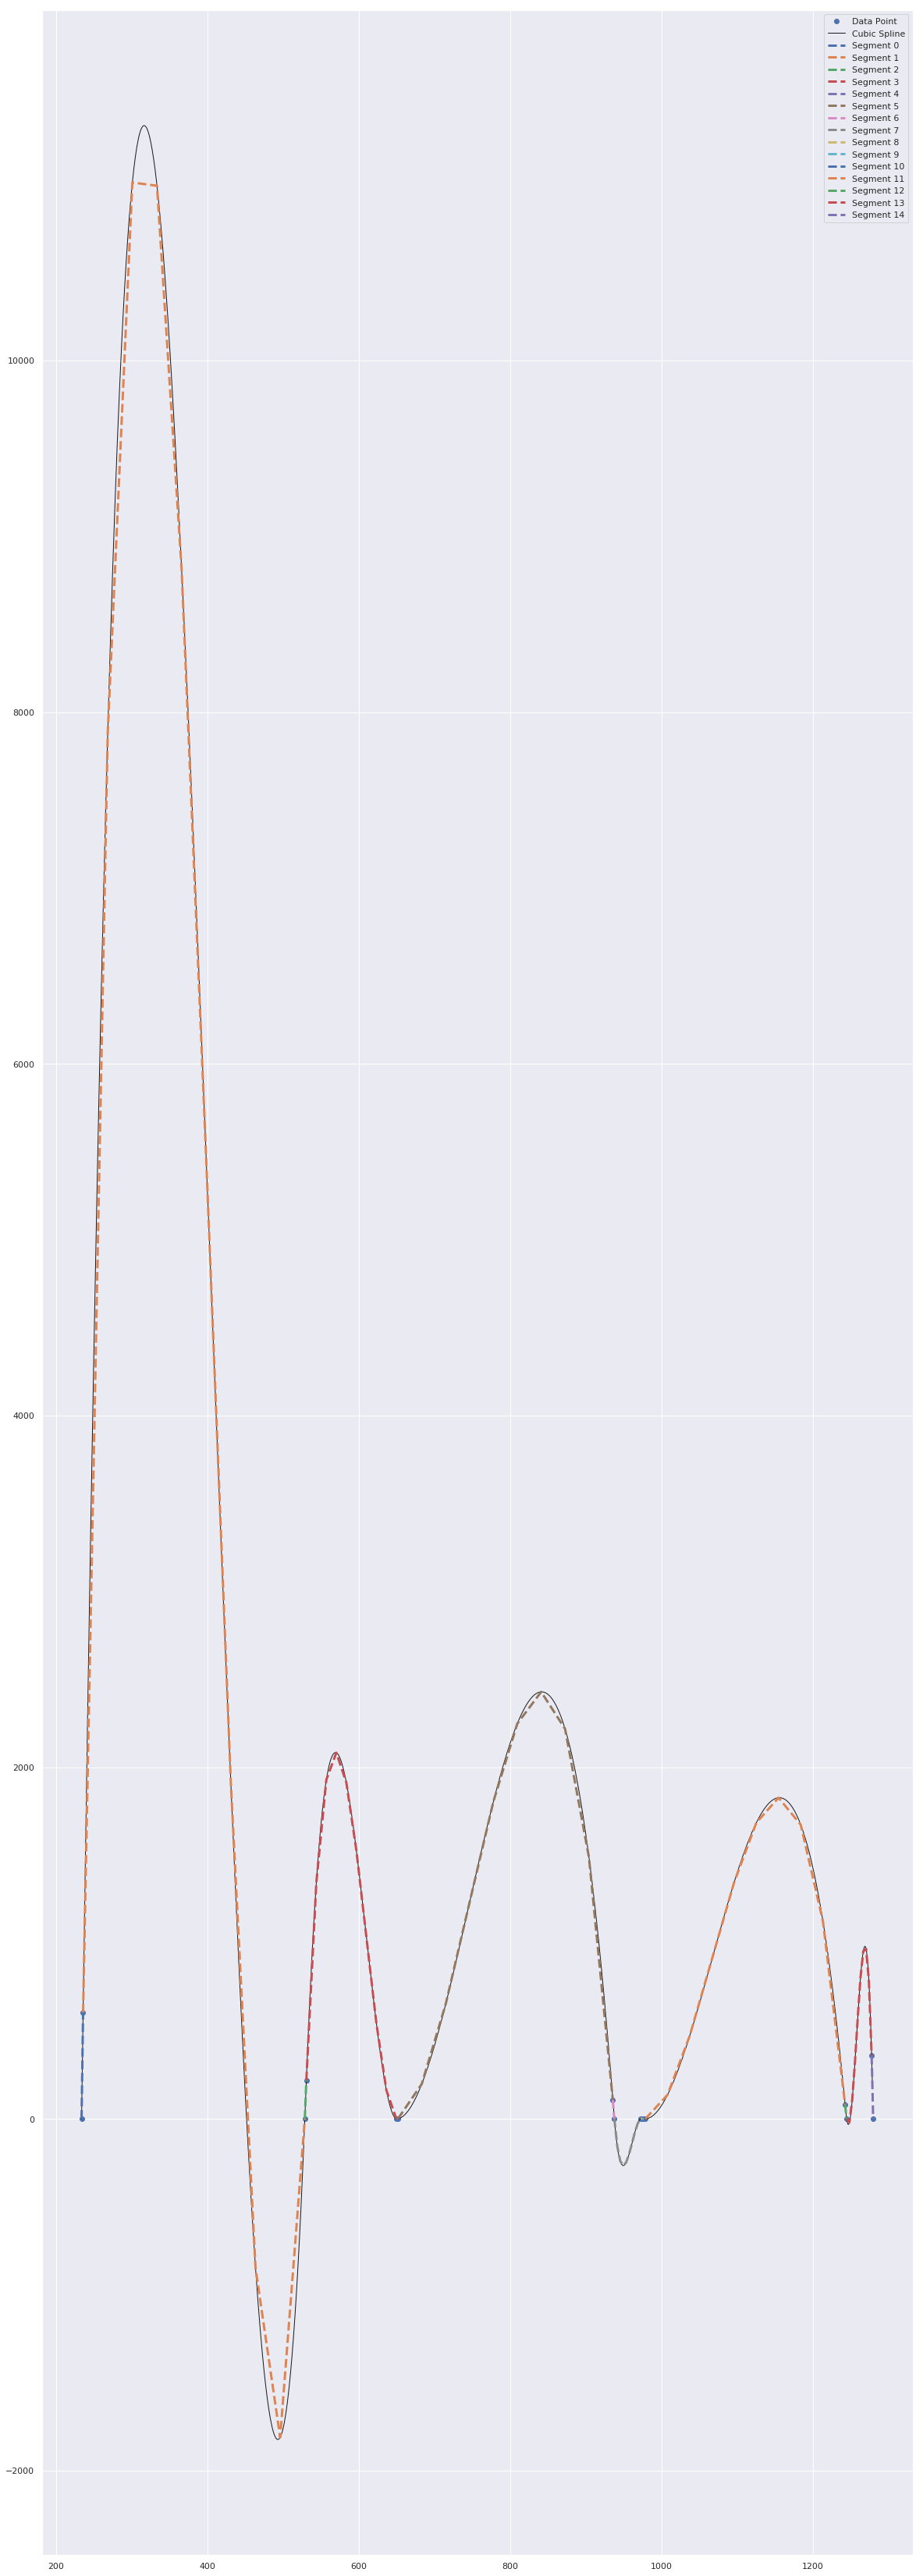

In [97]:
# fill up MasVnrArea with interpolation
# MasVnrArea
# I am generating a graph of a cubic spline through a given set of data points:
# I would drop the values associated with NaN values and develop a model for the remaining value pairs and then predict over all x. Like so:
from scipy import interpolate
# Create data with missing y values
x = np.array([234,236,529,531,650,652,936,938,973,975,977,979,1243,1245,1278,1280])
y = np.array([0,604,0,219,0,0,108,0,0,0,0,0,81,0,359,0])
arr = np.arange(np.amin(x), np.amax(x), 1)
s = interpolate.CubicSpline(x,y)

fig, ax = plt.subplots(figsize=(20, 60))
ax.plot(x, y, 'bo', label='Data Point')
ax.plot(arr, s(arr), 'k-', label='Cubic Spline', lw=1)

for i in range(x.shape[0] - 1):
    segment_x = np.linspace(x[i], x[i + 1], 10)
    # A (4, 100) array, where the rows contain (x-x[i])**3, (x-x[i])**2 etc.
    exp_x = (segment_x - x[i])[None, :] ** np.arange(4)[::-1, None]
    # Sum over the rows of exp_x weighted by coefficients in the ith column of s.c
    segment_y = s.c[:, i].dot(exp_x)
    ax.plot(segment_x, segment_y, label='Segment {}'.format(i), ls='--', lw=3)

ax.legend()
plt.show()

In [98]:
# MasVnrArea
from scipy.interpolate import CubicSpline

# calculate natural cubic spline polynomials
cs = CubicSpline(x,y,bc_type='natural')

# show values of interpolation function at x missing
print('S(235) = ', cs(235))
print('S(530) = ', cs(530))
print('S(651) = ', cs(651))
print('S(937) = ', cs(937))
print('S(974) = ', cs(974))
print('S(978) = ', cs(978))
print('S(1244) = ', cs(1244))
print('S(1279) = ', cs(1279))

S(235) =  303.2151287388139
S(530) =  109.53658817500934
S(651) =  -0.5627536540567624
S(937) =  52.77554150651744
S(974) =  0.49038395277520813
S(978) =  -0.01860322572498036
S(1244) =  36.77810685939264
S(1279) =  185.41562010796957


In [99]:
# MasVnrArea
train_df.at[235,'MasVnrArea'] = 303.2
train_df.at[530,'MasVnrArea'] = 109.5
train_df.at[651,'MasVnrArea'] = -0.6
train_df.at[937,'MasVnrArea'] = 52.8
train_df.at[974,'MasVnrArea'] = 0.5
train_df.at[978,'MasVnrArea'] = -0.02
train_df.at[1244,'MasVnrArea'] = 36.8
train_df.at[1279,'MasVnrArea'] = 185.4

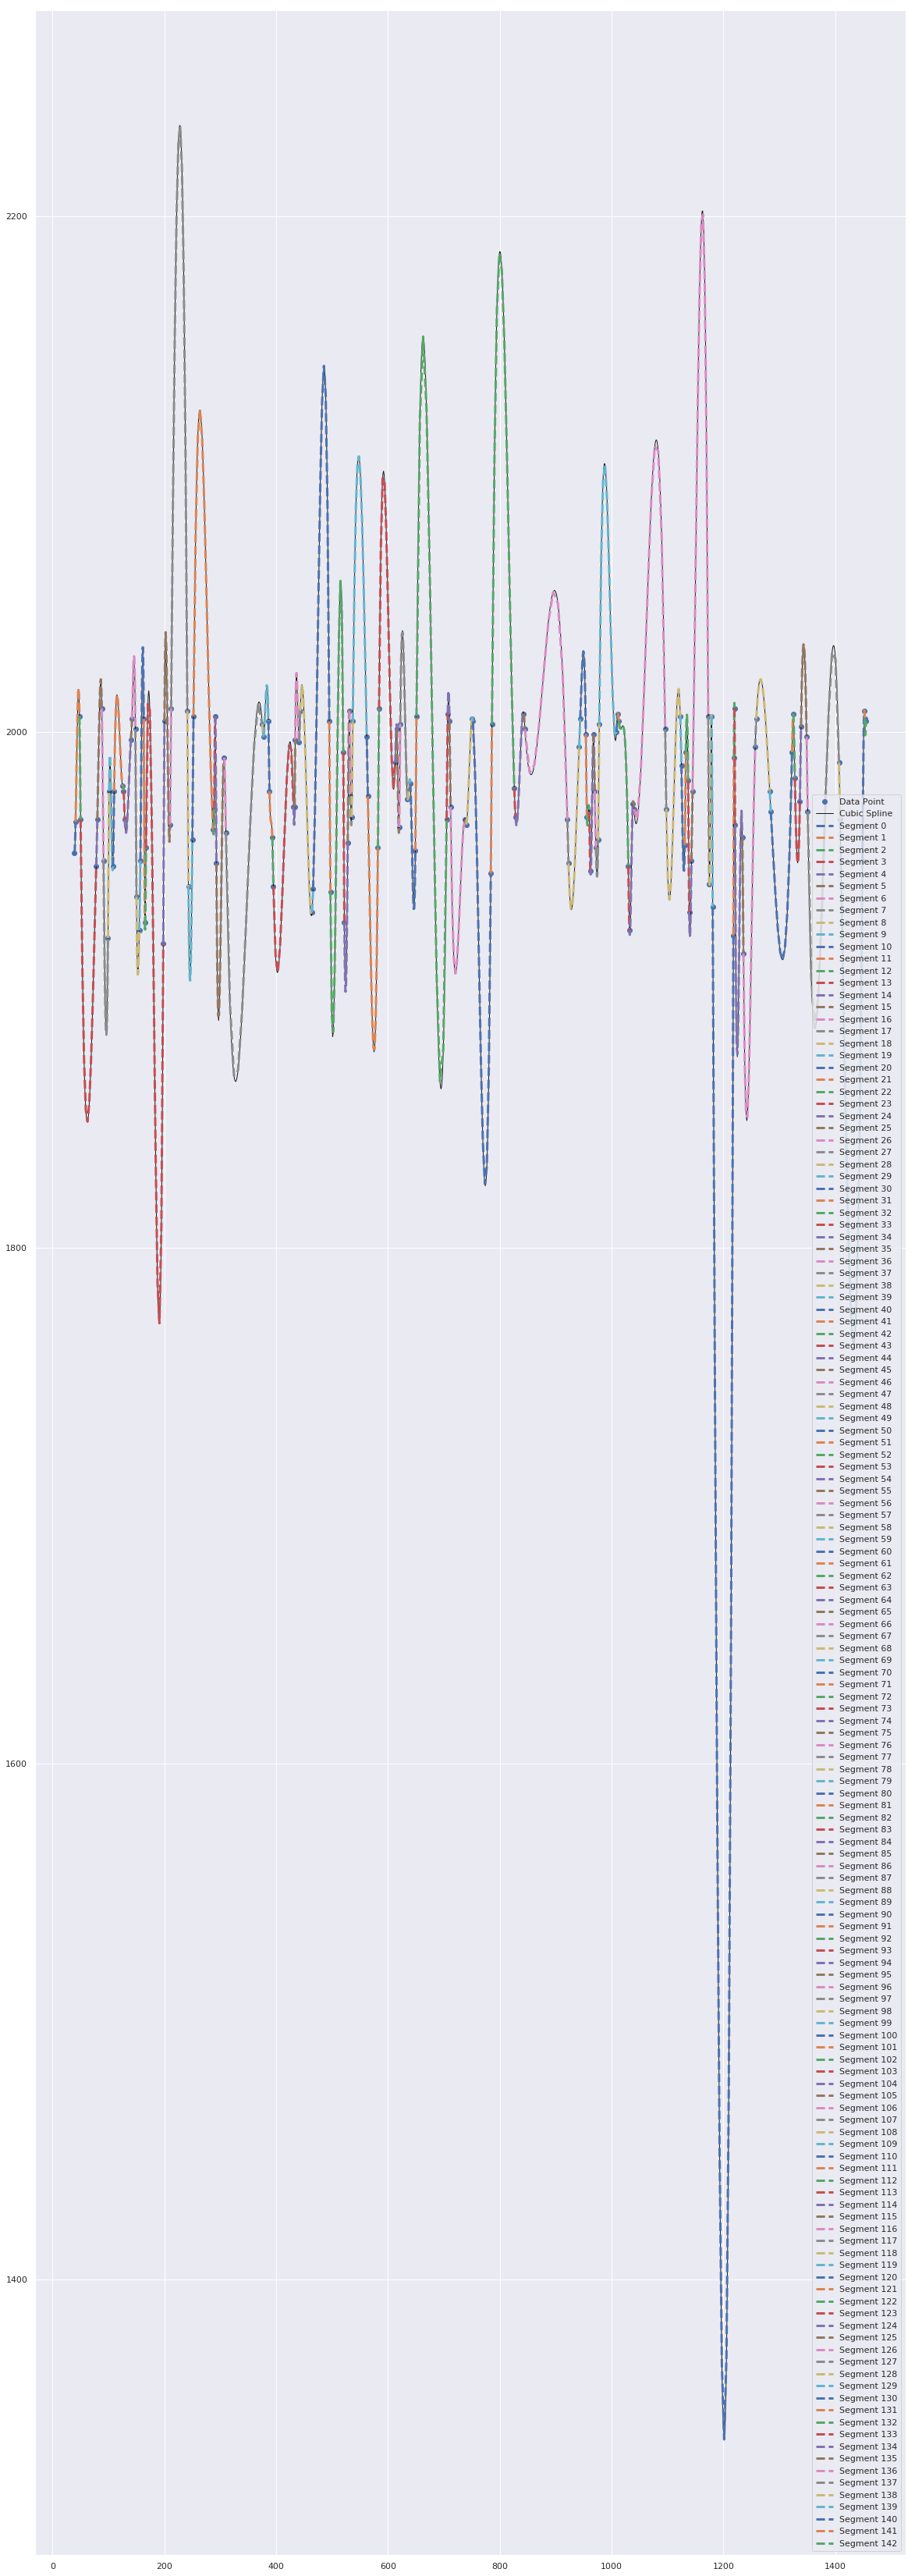

In [100]:
# fill up GarageYrBlt with the interpolation
# GarageYrBlt
from scipy import interpolate
#I am generating a graph of a cubic spline through a given set of data points:
#I would drop the values associated with NaN values and develop a model for the remaining value pairs and then predict over all x. Like so:

# Create data with missing y values
x = np.array([39,41,48,50,78,80,88,91,99,101,108,110,125,127,129,140,142,148,150,155,
              157,163,165,167,198,200,210,212,241,243,250,252,287,289,291,293,307,310,375,377,
              386,388,393,395,431,433,434,441,443,464,466,495,497,520,522,528,531,533,535,537,
              562,564,582,584,613,616,620,622,635,638,640,649,651,705,707,710,712,738,740,750,
              752,784,786,826,828,843,845,921,923,942,944,954,956,960,962,968,970,972,976,
              978,1009,1011,1013,1030,1032,1038,1040,1096,1098,1123,1125,1131,1133,1137,1139,1143,1145,1173,1175,
              1179,1181,1218,1219,1220,1221,1234,1236,1257,1259,1283,1285,1323,1325,1328,1337,1339,1349,1351,1407,
              1409,1449,1452,1453,1455])
y = np.array([1953,1965,2006,1966,1948,1966,2009,1950,1920,1977,1948,1977,1979,1977,1966,1997,2005,2001,1936,1923,
              1950,2005,1926,1955,1918,2004,1964,2009,2008,1940,1958,2006,1962,1970,2006,1949,1990,1961,2003,
              1998,2004,1977,1959,1940,1971,1971,1997,1996,2008,1930,1939,2004,1938,1992,1926,1957,2008,1975,1967,
              2004,1998,1975,1955,2009,1988,2001,1963,2003,1974,1980,1980,1954,2006,1966,2007,2004,1971,1966,
              1964,2005,2004,1945,2003,1978,1967,2007,2001,1966,1949,1994,2005,1999,1967,1969,1946,1999,1977,1955,
              1958,2003,2000,2007,2004,1948,1923,1972,1970,2001,1970,2006,1987,1956,1992,1981,1930,1950,1977,2006,
              1941,2006,1932,1921,1990,2009,1964,1959,1914,1994,2005,1977,1969,1992,2007,1982,1973,2002,1998,1969,
              1988,1966,1950,2008,2005,2004])
arr = np.arange(np.amin(x), np.amax(x), 1)
s = interpolate.CubicSpline(x,y)

fig, ax = plt.subplots(figsize=(20, 60))
ax.plot(x, y, 'bo', label='Data Point')
ax.plot(arr, s(arr), 'k-', label='Cubic Spline', lw=1)

for i in range(x.shape[0] - 1):
    segment_x = np.linspace(x[i], x[i + 1], 10)
    # A (4, 100) array, where the rows contain (x-x[i])**3, (x-x[i])**2 etc.
    exp_x = (segment_x - x[i])[None, :] ** np.arange(4)[::-1, None]
    # Sum over the rows of exp_x weighted by coefficients in the ith column of s.c
    segment_y = s.c[:, i].dot(exp_x)
    ax.plot(segment_x, segment_y, label='Segment {}'.format(i), ls='--', lw=3)

ax.legend()
plt.show()

In [101]:
# GarageYrBlt
from scipy.interpolate import CubicSpline

# calculate natural cubic spline polynomials
cs = CubicSpline(x,y,bc_type='natural')

# show values of interpolation function at x missing
print('S(40) = ', cs(40))
print('S(49) = ', cs(49))
print('S(79) = ', cs(79))
print('S(89) = ', cs(89))
print('S(90) = ', cs(90))
print('S(100) = ', cs(100))
print('S(109) = ', cs(109))
print('S(126) = ', cs(126))
print('S(128) = ', cs(128))
print('S(141) = ', cs(141))
print('S(149) = ', cs(149))
print('S(156) = ', cs(156))
print('S(164) = ', cs(164))
print('S(166) = ', cs(166))
print('S(199) = ', cs(199))
print('S(211) = ', cs(211))
print('S(242) = ', cs(242))
print('S(251) = ', cs(251))
print('S(288) = ', cs(288))
print('S(292) = ', cs(292))
print('S(308) = ', cs(308))
print('S(376) = ', cs(376))
print('S(387) = ', cs(387))
print('S(394) = ', cs(394))
print('S(432) = ', cs(432))
print('S(435) = ', cs(435))
print('S(442) = ', cs(442))
print('S(465) = ', cs(465))
print('S(496) = ', cs(496))
print('S(521) = ', cs(521))
print('S(529) = ', cs(529))
print('S(534) = ', cs(534))
print('S(536) = ', cs(536))
print('S(563) = ', cs(563))
print('S(583) = ', cs(583))
print('S(614) = ', cs(614))
print('S(615) = ', cs(615))
print('S(621) = ', cs(621))
print('S(636) = ', cs(636))
print('S(637) = ', cs(637))
print('S(639) = ', cs(639))
print('S(650) = ', cs(650))
print('S(706) = ', cs(706))
print('S(711) = ', cs(711))
print('S(739) = ', cs(739))
print('S(751) = ', cs(751))
print('S(785) = ', cs(785))
print('S(827) = ', cs(827))
print('S(844) = ', cs(844))
print('S(922) = ', cs(922))
print('S(943) = ', cs(943))
print('S(955) = ', cs(955))
print('S(961) = ', cs(961))
print('S(969) = ', cs(969))
print('S(971) = ', cs(971))
print('S(977) = ', cs(977))
print('S(1010) = ', cs(1010))
print('S(1012) = ', cs(1012))
print('S(1031) = ', cs(1031))
print('S(1039) = ', cs(1039))
print('S(1097) = ', cs(1097))
print('S(1124) = ', cs(1124))
print('S(1132) = ', cs(1132))
print('S(1138) = ', cs(1138))
print('S(1144) = ', cs(1144))
print('S(1174) = ', cs(1174))
print('S(1180) = ', cs(1180))
print('S(1219) = ', cs(1219))
print('S(1220) = ', cs(1220))
print('S(1235) = ', cs(1235))
print('S(1258) = ', cs(1258))
print('S(1284) = ', cs(1284))
print('S(1324) = ', cs(1324))
print('S(1326) = ', cs(1326))
print('S(1327) = ', cs(1327))
print('S(1338) = ', cs(1338))
print('S(1350) = ', cs(1350))
print('S(1408) = ', cs(1408))
print('S(1450) = ', cs(1450))
print('S(1451) = ', cs(1451))
print('S(1454) = ', cs(1454))

S(40) =  1957.9963975347468
S(49) =  1988.0150313839936
S(79) =  1956.5434098201722
S(89) =  1992.9993934262102
S(90) =  1972.3060925131913
S(100) =  1950.119364751841
S(109) =  1960.1902812399583
S(126) =  1978.660934973915
S(128) =  1971.9399012080887
S(141) =  2000.2660265694938
S(149) =  1968.618189978574
S(156) =  1934.2403811107179
S(164) =  1960.1517967145808
S(166) =  1929.8650381727628
S(199) =  1963.6883483624795
S(211) =  1983.203897981579
S(242) =  1971.9333994053159
S(251) =  1981.9092067882968
S(288) =  1960.4754223562836
S(292) =  1985.3367000190353
S(308) =  1983.8823620649139
S(376) =  1999.8296908813675
S(387) =  1990.2235325745671
S(394) =  1950.3800948718108
S(432) =  1964.14156099537
S(435) =  2015.7100864508081
S(442) =  2000.5903121795714
S(465) =  1933.493736549117
S(496) =  1970.0305532036666
S(521) =  1957.6107984375637
S(529) =  1982.6564834196365
S(534) =  1964.452454721661
S(536) =  1982.4933662900062
S(563) =  1986.6408410542272
S(583) =  1981.886905852637

In [102]:
# GarageYrBlt
train_df.at[40,'GarageYrBlt'] = 1957
train_df.at[49,'GarageYrBlt'] = 1988
train_df.at[79,'GarageYrBlt'] = 1956
train_df.at[89,'GarageYrBlt'] = 1992
train_df.at[90,'GarageYrBlt'] = 1972
train_df.at[100,'GarageYrBlt'] = 1950
train_df.at[109,'GarageYrBlt'] = 1960
train_df.at[126,'GarageYrBlt'] = 1978
train_df.at[128,'GarageYrBlt'] = 1971
train_df.at[141,'GarageYrBlt'] = 2000
train_df.at[149,'GarageYrBlt'] = 1968
train_df.at[156,'GarageYrBlt'] = 1934
train_df.at[164,'GarageYrBlt'] = 1960
train_df.at[166,'GarageYrBlt'] = 1929
train_df.at[199,'GarageYrBlt'] = 1963
train_df.at[211,'GarageYrBlt'] = 1983
train_df.at[242,'GarageYrBlt'] = 1971
train_df.at[251,'GarageYrBlt'] = 1981
train_df.at[288,'GarageYrBlt'] = 1960
train_df.at[292,'GarageYrBlt'] = 1985
train_df.at[308,'GarageYrBlt'] = 1983
train_df.at[376,'GarageYrBlt'] = 1999
train_df.at[387,'GarageYrBlt'] = 1990
train_df.at[394,'GarageYrBlt'] = 1950
train_df.at[432,'GarageYrBlt'] = 1964
train_df.at[435,'GarageYrBlt'] = 2015
train_df.at[442,'GarageYrBlt'] = 2000
train_df.at[465,'GarageYrBlt'] = 1933
train_df.at[496,'GarageYrBlt'] = 1970
train_df.at[521,'GarageYrBlt'] = 1957
train_df.at[529,'GarageYrBlt'] = 1982
train_df.at[534,'GarageYrBlt'] = 1964
train_df.at[536,'GarageYrBlt'] = 1982
train_df.at[563,'GarageYrBlt'] = 1986
train_df.at[583,'GarageYrBlt'] = 1981
train_df.at[614,'GarageYrBlt'] = 1996
train_df.at[615,'GarageYrBlt'] = 2002
train_df.at[621,'GarageYrBlt'] = 1979
train_df.at[636,'GarageYrBlt'] = 1974
train_df.at[637,'GarageYrBlt'] = 1977
train_df.at[639,'GarageYrBlt'] = 1981
train_df.at[650,'GarageYrBlt'] = 1978
train_df.at[706,'GarageYrBlt'] = 1988
train_df.at[711,'GarageYrBlt'] = 1988
train_df.at[739,'GarageYrBlt'] = 1964
train_df.at[751,'GarageYrBlt'] = 2005
train_df.at[785,'GarageYrBlt'] = 1973
train_df.at[827,'GarageYrBlt'] = 1971
train_df.at[844,'GarageYrBlt'] = 2004
train_df.at[922,'GarageYrBlt'] = 1957
train_df.at[943,'GarageYrBlt'] = 1999
train_df.at[955,'GarageYrBlt'] = 1980
train_df.at[961,'GarageYrBlt'] = 1957
train_df.at[969,'GarageYrBlt'] = 1990
train_df.at[971,'GarageYrBlt'] = 1964
train_df.at[977,'GarageYrBlt'] = 1978
train_df.at[1010,'GarageYrBlt'] = 2004
train_df.at[1012,'GarageYrBlt'] = 2006
train_df.at[1031,'GarageYrBlt'] = 1933
train_df.at[1039,'GarageYrBlt'] = 1972
train_df.at[1097,'GarageYrBlt'] = 1985
train_df.at[1124,'GarageYrBlt'] = 1997
train_df.at[1132,'GarageYrBlt'] = 1973
train_df.at[1138,'GarageYrBlt'] = 1953
train_df.at[1144,'GarageYrBlt'] = 1963
train_df.at[1174,'GarageYrBlt'] = 1965
train_df.at[1180,'GarageYrBlt'] = 1978
train_df.at[1219,'GarageYrBlt'] = 1990
train_df.at[1220,'GarageYrBlt'] = 2009
train_df.at[1235,'GarageYrBlt'] = 1938
train_df.at[1258,'GarageYrBlt'] = 2000
train_df.at[1284,'GarageYrBlt'] = 1973
train_df.at[1324,'GarageYrBlt'] = 2001
train_df.at[1326,'GarageYrBlt'] = 2003
train_df.at[1327,'GarageYrBlt'] = 1993
train_df.at[1338,'GarageYrBlt'] = 1987
train_df.at[1350,'GarageYrBlt'] = 1983
train_df.at[1408,'GarageYrBlt'] = 1977
train_df.at[1450,'GarageYrBlt'] = 1976
train_df.at[1451,'GarageYrBlt'] = 1997
train_df.at[1454,'GarageYrBlt'] = 2003

In [103]:
# from the data description file, NA = No Alley Access
train_df["Alley"] = train_df["Alley"].fillna("None")

In [104]:
# fill up NA values with mode
train_df['Utilities'] = train_df['Utilities'].fillna(train_df['Utilities'].mode()[0])

In [105]:
# fill up MasVnrType with the mode value
train_df["MasVnrType"] = train_df["MasVnrType"].fillna(train_df['MasVnrType'].mode()[0])

In [106]:
# for these columns, NA = No Basement
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    train_df[col] = train_df[col].fillna('None')

In [107]:
# substitue NA value here with mode
train_df['Electrical'] = train_df['Electrical'].fillna(train_df['Electrical'].mode()[0])

In [108]:
# NA = No Fireplace
train_df['FireplaceQu'] = train_df['FireplaceQu'].fillna('None')

In [109]:
# for these columns, NA = No Garage
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    train_df[col] = train_df[col].fillna('None')

In [110]:
# NA = no pool
train_df['PoolQC'] = train_df['PoolQC'].fillna('None')

In [111]:
# NA = no fence
train_df['Fence'] = train_df['Fence'].fillna('None')

In [112]:
#Misc Feature, NA = None
train_df['MiscFeature'] = train_df['MiscFeature'].fillna('None')

In [113]:
#sale type, only have 1 NA value. substitute it with mode value
train_df['SaleType'] = train_df['SaleType'].fillna(train_df['SaleType'].mode()[0])

In [114]:
# checking for any null value left
train_df.isnull().sum().sum()
# The 306 missing values correspond to the Sale Price we will predict

306

## Part 4: Data Exploration

- A large portion of the pre-modeling and modeling workflow can be generalized and automated

- But understanding the problem, domain, and data is extremely important for building high performing models

- We share some tools for exploring our data to make smarter decisions


#### Outlier detection

- An outlier is an observation that deviates drastically from other observations in a dataset

- Why are they problematic ?
   - Naturally occuring:
         - Not necessarily problematic
         - But can skew our model by affecting the slope 

- Error
  - Indicative of data quality issues
  - Treat in the same way as a missing value, i.e. use imputation

- Many, many approaches for detecting outliers; we used these one:
  - Tukey IQR


#### Univariate analysis

In [115]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(train_df['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83870376]
 [-1.83352844]
 [-1.80092766]
 [-1.78329881]
 [-1.77448439]
 [-1.62337999]
 [-1.61708398]
 [-1.58560389]
 [-1.58560389]
 [-1.5731    ]]

outer range (high) of the distribution:
[[3.82897043]
 [4.04098249]
 [4.49634819]
 [4.71041276]
 [4.73032076]
 [5.06214602]
 [5.42383959]
 [5.59185509]
 [7.10289909]
 [7.22881942]]


#### Bivariate analysis

In [116]:
# Interquartile range (IQR) middle 50%
# We get IQR for each column 
Q1 = train_df.quantile(0.25)
Q3 = train_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

MSSubClass          50.00
LotFrontage         20.70
LotArea           4048.00
OverallQual          2.00
OverallCond          1.00
YearBuilt           46.00
YearRemodAdd        37.00
MasVnrArea         166.00
BsmtFinSF1         712.25
BsmtFinSF2           0.00
BsmtUnfSF          585.00
TotalBsmtSF        502.50
1stFlrSF           509.25
2ndFlrSF           728.00
LowQualFinSF         0.00
GrLivArea          647.25
BsmtFullBath         1.00
BsmtHalfBath         0.00
FullBath             1.00
HalfBath             1.00
BedroomAbvGr         1.00
KitchenAbvGr         0.00
TotRmsAbvGrd         2.00
Fireplaces           1.00
GarageYrBlt         39.00
GarageCars           1.00
GarageArea         241.50
WoodDeckSF         168.00
OpenPorchSF         68.00
EnclosedPorch        0.00
3SsnPorch            0.00
ScreenPorch          0.00
PoolArea             0.00
MiscVal              0.00
MoSold               3.00
YrSold               2.00
SalePrice        84025.00
dtype: float64


In [117]:
# The data point where we have False that means these values are valid whereas True indicate presence of an outlier
print(train_df < (Q1 - 1.5 * IQR)) |(train_df > (Q3 + 1.5 * IQR))

TypeError: Could not operate array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan]) with block values '<' not supported between instances of 'str' and 'float'

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


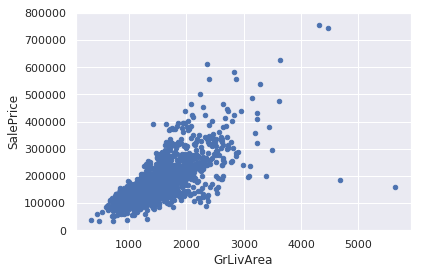

In [118]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [119]:
#see they are few outliers and they can affect our regression model by pulling the estimated line further away from true regression line ,so we removed them.
#new dataframe without outliers.
train_df = train_df[train_df['GrLivArea']<3000]

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


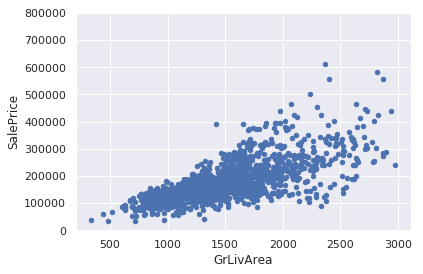

In [120]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


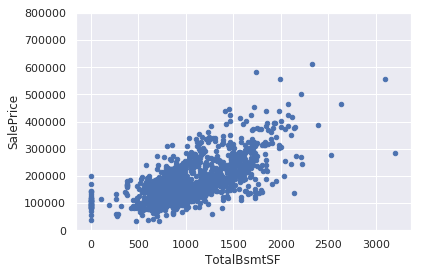

In [121]:
#bivariate analysis saleprice/TotalBsmtSF
var = 'TotalBsmtSF'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [122]:
# Looking at the distribution for GarageCars variable
my_tab = pd.crosstab(index=train_df["GarageCars"],  # Make a crosstab
                              columns="count")      # Name the count column
my_tab

col_0       count
GarageCars       
0              79
1             369
2             819
3             170
4               5

In [123]:
# Looking at the distribution for OverallQual variable
my_tab = pd.crosstab(index=train_df["OverallQual"],  # Make a crosstab
                              columns="count")      # Name the count column
my_tab

col_0        count
OverallQual       
1                2
2                3
3               20
4              116
5              396
6              373
7              316
8              162
9               42
10              12

In [124]:
# Looking at Outliers for FullBath variable
my_tab = pd.crosstab(index=train_df["FullBath"],  # Make a crosstab
                              columns="count")      # Name the count column
my_tab

col_0     count
FullBath       
0             9
1           650
2           761
3            22

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


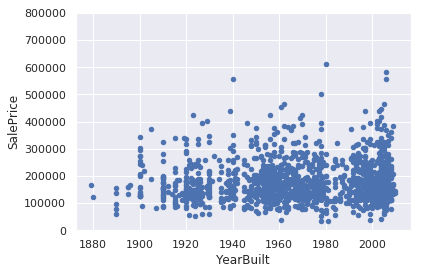

In [125]:
#bivariate analysis saleprice/YearBuilt
var = 'YearBuilt'
data = pd.concat([train_df['SalePrice'], test_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

#### Distribution of Features
- A histogram is a simple representation of the distribution of values for a given feature
- X-axis represents value bins and y-axis represents the frequency of an observation falling into that bin
- It is also interesting to look at distributions broken up by outcome categories
- Two independent sample t-test is used to compare the means of two independent groups and we check for normality and equal variance
- Standardize our data


#### Search for Normality
- Histogram - Kurtosis and skewness.
- Normal probability plot - Data distribution should closely follow the diagonal that represents the normal distribution.

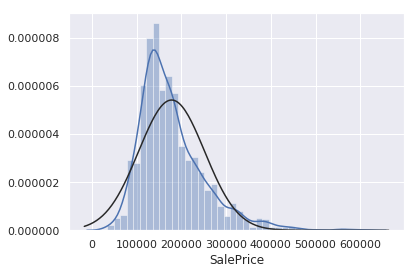

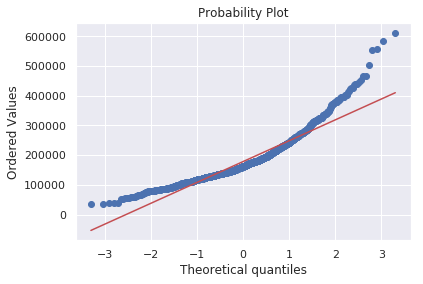

In [126]:
#histogram and normal probability plot
sns.distplot(train_df['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_df['SalePrice'], plot=plt)

In [127]:
#applying log transformation
train_dff = np.log(train_df['SalePrice'])

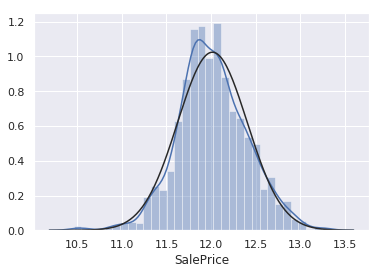

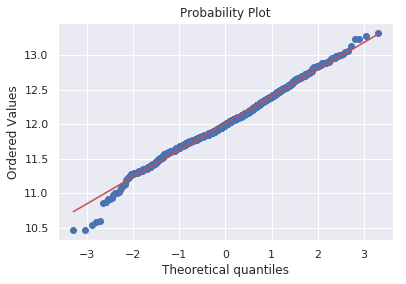

In [128]:
#transformed histogram and normal probability plot
sns.distplot(train_dff, fit=norm);
fig = plt.figure()
res = stats.probplot(train_dff, plot=plt)

#### Shapiro-Wilk Test
To check the normality for our continuous  data distribution

In [129]:
from scipy import stats
diff = train_df['SalePrice'] - train_df['GrLivArea']
stats.shapiro(diff)

(0.9034433960914612, 3.0834851605572177e-29)

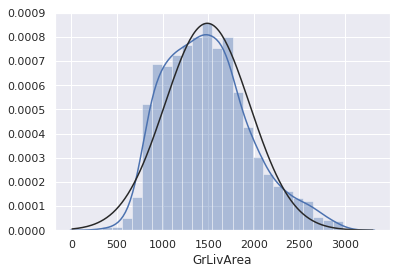

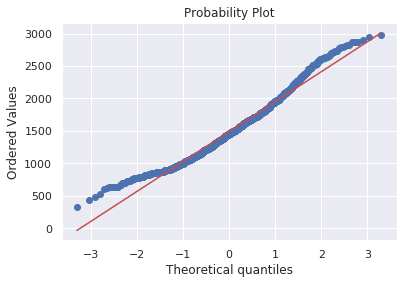

In [130]:
#histogram and normal probability plot
sns.distplot(train_df['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_df['GrLivArea'], plot=plt)

In [131]:
#data transformation
train_dfG = np.log(train_df['GrLivArea'])

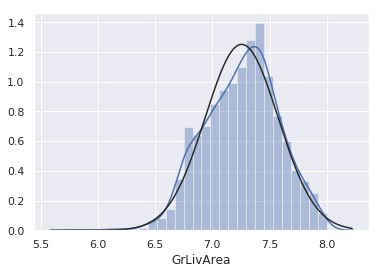

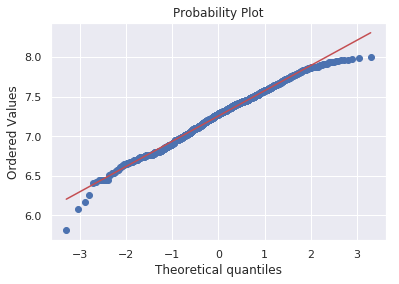

In [132]:
#transformed histogram and normal probability plot
sns.distplot(train_dfG, fit=norm);
fig = plt.figure()
res = stats.probplot(train_dfG, plot=plt)

In [133]:
diff = train_df['SalePrice'] - train_df['TotalBsmtSF']
stats.shapiro(diff)

(0.9037171602249146, 3.3411989621670885e-29)

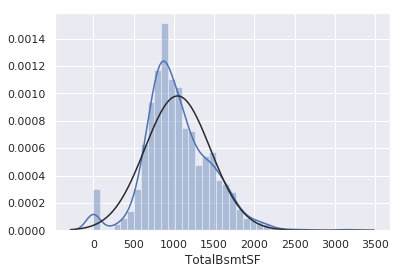

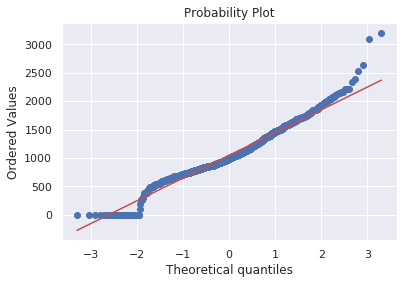

In [134]:
#histogram and normal probability plot
sns.distplot(train_df['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_df['TotalBsmtSF'], plot=plt)

In [135]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
train_df['HasBsmt'] = pd.Series(len(train_df['TotalBsmtSF']), index=train_df.index)
train_df['HasBsmt'] = 0 
train_df.loc[train_df['TotalBsmtSF']>0,'HasBsmt'] = 1

In [136]:
#transform data
train_df.loc[train_df['HasBsmt']==1,'TotalBsmtSF'] = np.log(train_df['TotalBsmtSF'])

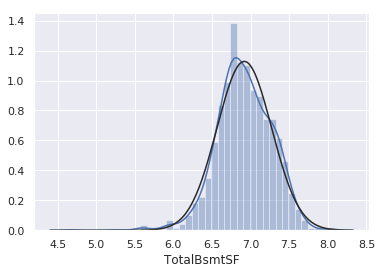

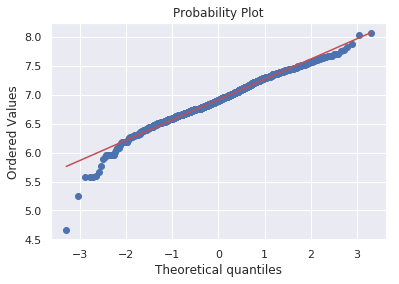

In [137]:
#histogram and normal probability plot
sns.distplot(train_df[train_df['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_df[train_df['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

In [138]:
train_df = train_df.drop(columns="HasBsmt")

#### two-sample Wilcoxon-test
 We want to see if two samples are selected from data having the same distribution.

In [139]:
z_statistic, p_value = wilcoxon(train_df['SalePrice'] - train_df['OverallQual'])
print ("two-sample wilcoxon-test", p_value)

two-sample wilcoxon-test 2.87123247850358e-237


In [140]:
z_statistic, p_value = wilcoxon(train_df['SalePrice'] - train_df['GarageCars'])
print ("two-sample wilcoxon-test", p_value)

two-sample wilcoxon-test 2.870016899017059e-237


In [141]:
z_statistic, p_value = wilcoxon(train_df['SalePrice'] - train_df['FullBath'])
print ("two-sample wilcoxon-test", p_value)

two-sample wilcoxon-test 2.86932428696516e-237


In [142]:
z_statistic, p_value = wilcoxon(train_df['SalePrice'] - train_df['YearBuilt'])
print ("two-sample wilcoxon-test", p_value)

two-sample wilcoxon-test 2.872758698318432e-237


####  Search for homoscedasticity
-  Homoscedasticity refers to the 'assumption that dependent variable(s) exhibit equal levels of variance across the range of predictor variable(s)
- Homoscedasticity is desirable because we want the error term to be the same across all values of the independent variables.
- Departures from an equal dispersion are shown by such shapes as cones (small dispersion at one side of the graph, large dispersion at the opposite side) or diamonds (a large number of points at the center of the distribution).

#### Levene Test
Use to asses if the groups have equal variances.

In [143]:
stats.levene(train_df['GrLivArea'], train_df['SalePrice'])

LeveneResult(statistic=1426.4838517613887, pvalue=5.878140826719082e-254)

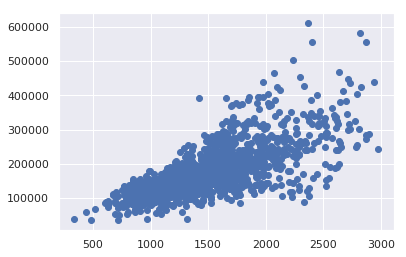

In [144]:
#scatter plot
plt.scatter(train_df['GrLivArea'], train_df['SalePrice']);

In [145]:
stats.levene(train_df['TotalBsmtSF'], train_df['SalePrice'])

LeveneResult(statistic=1446.6055917264696, pvalue=7.100414493662318e-257)

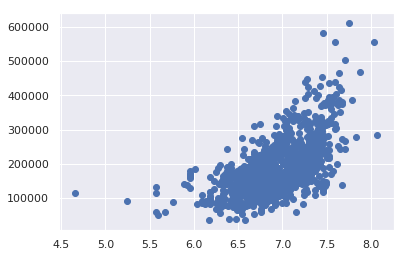

In [146]:
#scatter plot
plt.scatter(train_df[train_df['TotalBsmtSF']>0]['TotalBsmtSF'], train_df[train_df['TotalBsmtSF']>0]['SalePrice']);

In [147]:
stats.levene(train_df['YearBuilt'], train_df['SalePrice'])

LeveneResult(statistic=1445.2827320145882, pvalue=1.1033175031548746e-256)

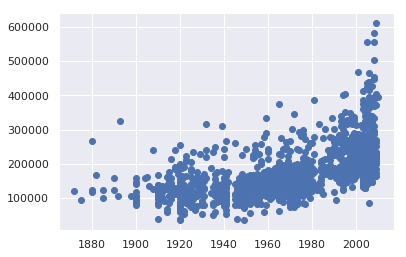

In [148]:
#scatter plot
plt.scatter(train_df['YearBuilt'], train_df['SalePrice']);

In [149]:
stats.levene(train_df['GarageCars'], train_df['SalePrice'])

LeveneResult(statistic=1446.6032782024351, pvalue=7.105888945738217e-257)

In [150]:
stats.levene(train_df['FullBath'], train_df['SalePrice'])

LeveneResult(statistic=1446.6039169850221, pvalue=7.104376983537265e-257)

In [151]:
stats.levene(train_df['OverallQual'], train_df['SalePrice'])

LeveneResult(statistic=1446.5725815957248, pvalue=7.178926877654726e-257)

In [152]:
train_df

MSSubClass MSZoning    ...      SaleCondition  SalePrice
0             60       RL    ...             Normal     208500
1             20       RL    ...             Normal     181500
2             60       RL    ...             Normal     223500
3             70       RL    ...            Abnorml     140000
4             60       RL    ...             Normal     250000
5             50       RL    ...             Normal     143000
6             20       RL    ...             Normal     307000
7             60       RL    ...             Normal     200000
8             50       RM    ...            Abnorml     129900
9            190       RL    ...             Normal     118000
10            20       RL    ...             Normal     129500
11            60       RL    ...            Partial     345000
12            20       RL    ...             Normal     144000
13            20       RL    ...            Partial     279500
14            20       RL    ...             Normal     157000
15            45       RM    ...             Normal     132000
16            20       RL    ...             Normal     149000
17            90       RL    ...             Normal      90000
18            20       RL    ...             Normal     159000
19            20       RL    ...            Abnorml     139000
20            60       RL    ...            Partial     325300
21            45       RM    ...             Normal     139400
22            20       RL    ...             Normal     230000
23           120       RM    ...             Normal     129900
24            20       RL    ...             Normal     154000
25            20       RL    ...             Normal     256300
26            20       RL    ...             Normal     134800
27            20       RL    ...             Normal     306000
28            20       RL    ...             Normal     207500
29            30       RM    ...             Normal      68500
...          ...      ...    ...                ...        ...
1430          60       RL    ...             Normal     192140
1431         120       RL    ...             Normal     143750
1432          30       RL    ...             Normal      64500
1433          60       RL    ...             Normal     186500
1434          20       RL    ...             Normal     160000
1435          20       RL    ...            Abnorml     174000
1436          20       RL    ...             Normal     120500
1437          20       RL    ...            Partial     394617
1438          20       RM    ...             Normal     149700
1439          60       RL    ...             Normal     197000
1440          70       RL    ...             Normal     191000
1441         120       RM    ...             Normal     149300
1442          60       FV    ...             Normal     310000
1443          30       RL    ...             Normal     121000
1444          20       RL    ...             Normal     179600
1445          85       RL    ...             Normal     129000
1446          20       RL    ...             Normal     157900
1447          60       RL    ...             Normal     240000
1448          50       RL    ...             Normal     112000
1449         180       RM    ...            Abnorml      92000
1450          90       RL    ...             Normal     136000
1451          20       RL    ...            Partial     287090
1452         180       RM    ...             Normal     145000
1453          20       RL    ...            Abnorml      84500
1454          20       FV    ...             Normal     185000
1455          60       RL    ...             Normal     175000
1456          20       RL    ...             Normal     210000
1457          70       RL    ...             Normal     266500
1458          20       RL    ...             Normal     142125
1459          20       RL    ...             Normal     147500

[1442 rows x 80 columns]

In [153]:
# Although,  'Neighborhood' has a lot of unique categories, most categories only have a few observations
train_df['Alley'].value_counts().sort_values(ascending=False).head()

None    1352
Grvl      50
Pave      40
Name: Alley, dtype: int64

In [154]:
# In this case, bucket low frequency categories as 'other'
need = train_df['Alley'].value_counts().index[2:]
train_df['enc_alley'] = np.where(train_df['Alley'].isin(need), train_df['Alley'], 'Other')

valCount = train_df['enc_alley'].value_counts()

In [155]:
print(valCount)

Other    1402
Pave       40
Name: enc_alley, dtype: int64


In [156]:
test_df['Alley'].value_counts().sort_values(ascending=False).head()

Grvl    70
Pave    37
Name: Alley, dtype: int64

In [157]:
# In this case, bucket low frequency categories as 'other'
need = test_df['Alley'].value_counts().index[1:]
test_df['enc_alley'] = np.where(test_df['Alley'].isin(need), test_df['Alley'], 'Other')

valCounttest = test_df['enc_alley'].value_counts()

In [158]:
print(valCounttest)

Other    1422
Pave       37
Name: enc_alley, dtype: int64


In [159]:
#create new columns called ebc_alley for both test and train
train_df['enc_alley'] = pd.get_dummies(train_df.enc_alley  , drop_first=True)
test_df['enc_alley'] = pd.get_dummies(test_df.enc_alley, drop_first=True)

In [160]:
#encoding values
print ('Encoded: \n')
print (train_df['enc_alley'].value_counts())

Encoded: 

0    1402
1      40
Name: enc_alley, dtype: int64


In [161]:
train_df.head()

MSSubClass MSZoning    ...      SalePrice  enc_alley
0          60       RL    ...         208500          0
1          20       RL    ...         181500          0
2          60       RL    ...         223500          0
3          70       RL    ...         140000          0
4          60       RL    ...         250000          0

[5 rows x 81 columns]

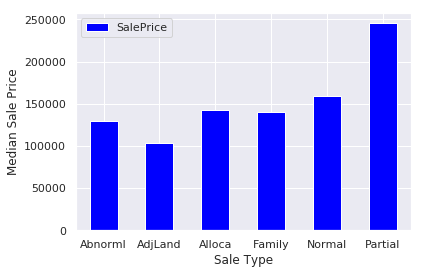

In [162]:
#look at the Sales Condition through pivot table
#notice tha partial has higher mean then the others
condition_pivot = train_df.pivot_table(index='SaleCondition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Sale Type')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [163]:
#since Partial has higher significance mean in sales others then the others
#we will encode this as a new feature and select all homes where salescondition is equal to partial and assign value of 1,otherwise )
def encode(x): return 1 if x == 'Partial' else 0
train_df['enc_condition'] = train_df.SaleCondition.apply(encode)
test_df['enc_condition'] = test_df.SaleCondition.apply(encode)

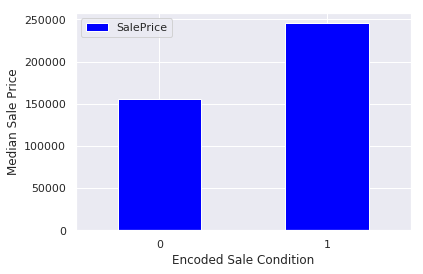

In [164]:
#Explore this new feature through pivot table
condition_pivot = train_df.pivot_table(index='enc_condition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Encoded Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [165]:
#fill the missing values with an average and then assign the results to data using interpolation
data = train_df.select_dtypes(include=[np.number]).interpolate().dropna()

In [166]:
data

MSSubClass  LotFrontage      ...        enc_alley  enc_condition
0             60        65.00      ...                0              0
1             20        80.00      ...                0              0
2             60        68.00      ...                0              0
3             70        60.00      ...                0              0
4             60        84.00      ...                0              0
5             50        85.00      ...                0              0
6             20        75.00      ...                0              0
7             60        67.05      ...                0              0
8             50        59.10      ...                0              0
9            190        50.00      ...                0              0
10            20        70.00      ...                0              0
11            60        85.00      ...                0              1
12            20        90.15      ...                0              0
13            20        95.30      ...                0              1
14            20        81.95      ...                0              0
15            45        68.60      ...                0              0
16            20        63.20      ...                0              0
17            90        57.80      ...                0              0
18            20        66.00      ...                0              0
19            20        70.00      ...                0              0
20            60       101.00      ...                0              1
21            45        57.00      ...                0              0
22            20        75.00      ...                0              0
23           120        44.00      ...                0              0
24            20        61.25      ...                0              0
25            20        78.50      ...                0              0
26            20        60.00      ...                0              0
27            20        98.00      ...                0              0
28            20        47.00      ...                0              0
29            30        60.00      ...                0              0
...          ...          ...      ...              ...            ...
1430          60        57.80      ...                0              0
1431         120        59.20      ...                0              0
1432          30        60.60      ...                0              0
1433          60        93.00      ...                0              0
1434          20        80.00      ...                0              0
1435          20        80.00      ...                0              0
1436          20        60.00      ...                0              0
1437          20        96.00      ...                0              1
1438          20        90.00      ...                0              0
1439          60        80.00      ...                0              0
1440          70        79.00      ...                0              0
1441         120        82.40      ...                0              0
1442          60        85.80      ...                0              0
1443          30        78.90      ...                0              0
1444          20        72.00      ...                0              0
1445          85        70.00      ...                0              0
1446          20        73.25      ...                0              0
1447          60        76.50      ...                0              0
1448          50        70.00      ...                0              0
1449         180        21.00      ...                0              0
1450          90        60.00      ...                0              0
1451          20        78.00      ...                0              1
1452         180        35.00      ...                0              0
1453          20        90.00      ...                0              0
1454          20        62.00 

In [167]:
#check if the are still missing values
print(sum(data.isnull().sum() != 0))

0


#### Model building

In [168]:
#Separate the features and target variable for modelling.
#Assign features to X and target to y
y = np.log(train_df.SalePrice)
X = data.drop(['SalePrice'], axis=1)

#### Partitioning Data

In [169]:
#Partitioning the data in this way allows us to evaluate how our model might perform on data that it has never seen before.
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=.1)

In [170]:
# Use feature selection to select the most important features
import sklearn.feature_selection

select = sklearn.feature_selection.SelectKBest(k=36)
selected_features = select.fit(X_train, y_train)
indices_selected = selected_features.get_support(indices=True)
colnames_selected = [X.columns[i] for i in indices_selected]

X_train_selected = X_train[colnames_selected]
X_test_selected = X_test[colnames_selected]

In [171]:
colnames_selected

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'enc_alley',
 'enc_condition']

#### Multicolinearity
- Variance Inflation Factor (VIF)
Is a measure of colinearity among predictor variables within a multiple regression
  - VIF = 1 : no correlation between that predictor and the other variables
  - VIF = 4 : Suspicious, needs to be looked into
  - VIF = 5-10 : “Houston, we have a problem.” Look into it or drop the variable.

In [172]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [173]:
vif.round(1)

VIF Factor       features
0   4.700000e+00     MSSubClass
1   1.520000e+01    LotFrontage
2   2.600000e+00        LotArea
3   6.800000e+01    OverallQual
4   4.310000e+01    OverallCond
5   2.087180e+04      YearBuilt
6   2.259990e+04   YearRemodAdd
7   1.800000e+00     MasVnrArea
8   2.310000e+01     BsmtFinSF1
9   2.600000e+00     BsmtFinSF2
10  2.910000e+01      BsmtUnfSF
11  1.161000e+02    TotalBsmtSF
12           inf       1stFlrSF
13           inf       2ndFlrSF
14           inf   LowQualFinSF
15           inf      GrLivArea
16  3.800000e+00   BsmtFullBath
17  1.200000e+00   BsmtHalfBath
18  2.660000e+01       FullBath
19  3.500000e+00       HalfBath
20  3.230000e+01   BedroomAbvGr
21  3.990000e+01   KitchenAbvGr
22  8.770000e+01   TotRmsAbvGrd
23  3.000000e+00     Fireplaces
24  1.880600e+04    GarageYrBlt
25  3.740000e+01     GarageCars
26  3.230000e+01     GarageArea
27  1.900000e+00     WoodDeckSF
28  1.800000e+00    OpenPorchSF
29  1.500000e+00  EnclosedPorch
30  1.000000e+00      3SsnPorch
31  1.200000e+00    ScreenPorch
32  1.000000e+00       PoolArea
33  1.000000e+00        MiscVal
34  6.700000e+00         MoSold
35  2.538530e+04         YrSold
36  1.200000e+00      enc_alley
37  1.400000e+00  enc_condition

#### Remedies for VIF
Recode the predictors in a way that reduces correlations e.g., using orthogonal polynomials instead of polynomials

#### Create a Regression model

In [174]:
#instatiate a model
lr = linear_model.LinearRegression()

In [175]:
#fit the model to estimate relationship between our predictors and the target variable so that we can make a predictions on the new data
model = lr.fit(X_train, y_train)

#### Backward Elimination
Drop the variable which is not significant(p>0.05)

In [176]:
# Predicting the Test set results
y_pred = model.predict(X_test)
# Building Optimal Model using Backward Elimination
import statsmodels.formula.api as sm
X_opt = X
regressor_OLS = sm.OLS(endog =y, exog = X_opt).fit()
regressor_OLS.summary()
# Backward Eliminiation Process
# Drop the variable which is not significant(p>0.05)
X_opt = X.drop(['MSSubClass','LotFrontage','LotArea'], axis=1)
regressor_OLS = sm.OLS(endog =y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.764e+05
Date:                Fri, 31 May 2019   Prob (F-statistic):               0.00
Time:                        08:41:33   Log-Likelihood:                 939.90
No. Observations:                1442   AIC:                            -1812.
Df Residuals:                    1408   BIC:                            -1632.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
OverallQual       0.0653      0.004     14.801      0.000       0.057       0.074
OverallCond       0.0543      0.004     13.986      0.000       0.047       0.062
YearBuilt         0.0028      0.000     11.440      0.000       0.002       0.003
YearRemodAdd      0.0009      0.000      3.418      0.001       0.000       0.001
MasVnrArea    -2.503e-05   2.28e-05     -1.097      0.273   -6.98e-05    1.97e-05
BsmtFinSF1        0.0003   2.61e-05      9.654      0.000       0.000       0.000
BsmtFinSF2        0.0002   3.19e-05      6.013      0.000       0.000       0.000
BsmtUnfSF         0.0002    2.5e-05      6.755      0.000       0.000       0.000
TotalBsmtSF      -0.0136      0.005     -2.603      0.009      -0.024      -0.003
1stFlrSF       9.876e-05    2.7e-05      3.656      0.000    4.58e-05       0.000
2ndFlrSF       9.955e-05   2.43e-05      4.094      0.000    5.18e-05       0.000
LowQualFinSF  -3.422e-05   6.51e-05     -0.525      0.599      -0.000    9.35e-05
GrLivArea         0.0002   2.45e-05      6.704      0.000       0.000       0.000
BsmtFullBath      0.0304      0.010      3.127      0.002       0.011       0.049
BsmtHalfBath      0.0050      0.015      0.327      0.744      -0.025       0.035
FullBath          0.0130      0.011      1.239      0.216      -0.008       0.034
HalfBath          0.0133      0.010      1.341      0.180      -0.006       0.033
BedroomAbvGr     -0.0033      0.006     -0.517      0.605      -0.016       0.009
KitchenAbvGr     -0.1095      0.018     -5.934      0.000      -0.146      -0.073
TotRmsAbvGrd      0.0095      0.005      2.010      0.045       0.000       0.019
Fireplaces        0.0424      0.007      6.471      0.000       0.030       0.055
GarageYrBlt       0.0001      0.000      0.484      0.629      -0.000       0.001
GarageCars        0.0399      0.011      3.712      0.000       0.019       0.061
GarageArea     8.586e-05   3.69e-05      2.328      0.020    1.35e-05       0.000
WoodDeckSF     9.526e-05   2.97e-05      3.209      0.001     3.7e-05       0.000
OpenPorchSF      1.7e-05   5.67e-05      0.300      0.765   -9.43e-05       0.000
EnclosedPorch     0.0001   6.42e-05      2.206      0.028    1.57e-05       0.000
3SsnPorch         0.0002      0.000      1.553      0.121   -4.71e-05       0.000
ScreenPorch       0.0002   6.48e-05      3.545      0.000       0.000       0.000
PoolArea          0.0001      0.000      1.044      0.297   -9.51e-05       0.000
MiscVal       -4.278e-06   6.82e-06     -0.628      0.530   -1.76e-05    9.09e-06
MoSold         -4.66e-05      0.001     -0.037      0.971      -0.003       0.002
YrSold            0.0016      0.000      5.966      0.000       0.001       0.002
enc_alley         0.0151      0.021      0.702      0.483      -0.027       0.057
enc_condition     0.0832      0.014      6.056   

#### Intercept

In [177]:
print('intercept:', model.intercept_)

intercept: 12.24031788404875


#### Slope

In [178]:
print('slope:', model.coef_)

slope: [-3.74654425e-04  3.99923119e-04  2.19804484e-06  7.16621132e-02
  5.37939280e-02  2.68652597e-03  1.01220654e-03 -1.43899565e-05
  2.25950419e-04  1.56626202e-04  1.51807763e-04 -1.30718042e-02
  7.93661314e-05  1.02741022e-04 -1.68725557e-05  1.65234598e-04
  3.25776310e-02  1.45334496e-02  1.72064978e-02  1.04569326e-02
 -1.19971959e-02 -7.49831253e-02  8.19361920e-03  3.94229841e-02
  2.72193808e-04  3.76416196e-02  6.31628873e-05  1.00239980e-04
  3.09090492e-05  1.14807363e-04  1.29522664e-04  2.57929144e-04
  1.09234897e-04 -6.61169054e-06 -9.52719352e-04 -4.69718100e-03
  3.71880107e-02  8.11884500e-02]


### Evaluate Performance

In [179]:
#r-squared value is a measure of how close the data are to the fitted regression line 
print("R^2 is: \n", model.score(X_test, y_test))

R^2 is: 
 0.8944698494539389


In [180]:
predictions = model.predict(X_test)

In [181]:
#RMSE measure the distance between actual values and predicted values
print('RMSE is: \n', mean_squared_error(y_test, predictions))

RMSE is: 
 0.01885109951993871


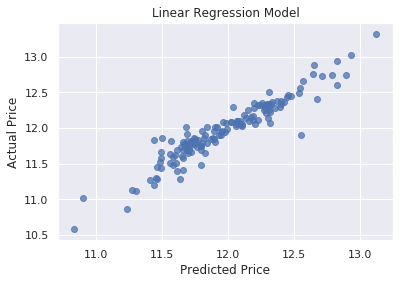

In [182]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.75,
            color='b')  # alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

### Improving the Model
Ridge Regression for dealing with Multicollinarity

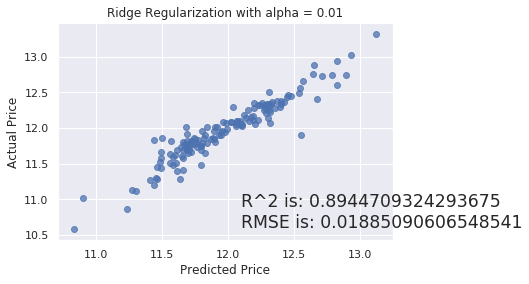

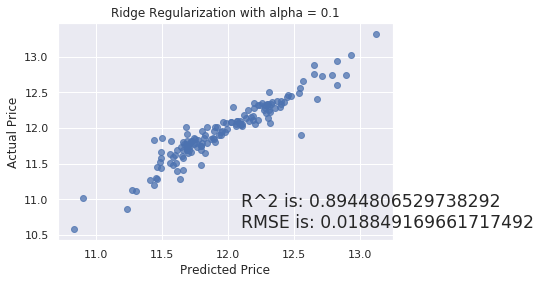

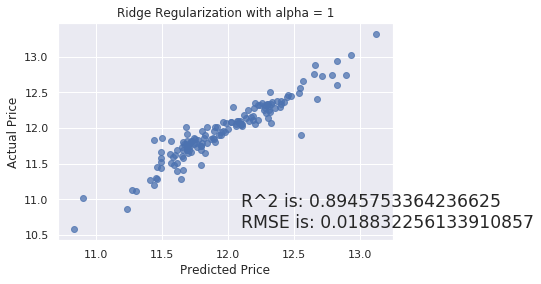

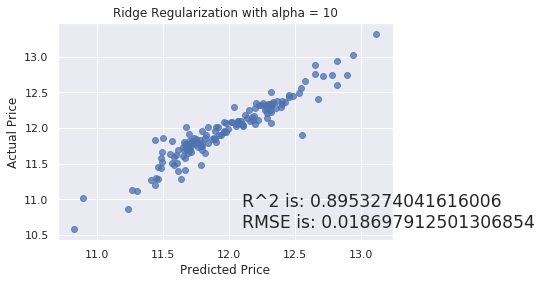

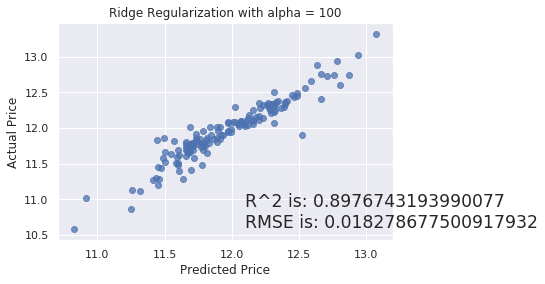

In [183]:
#Use ridge regularization to shrink the regression coefficients of less important features
#by looking at the graph comparing it to the previous one they are almost the same,meaning the alpha did not substancially improve the model.
for i in range (-2, 3):
    alpha = 10**i
    rm = linear_model.Ridge(alpha=alpha)
    ridge_model = rm.fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_test)

    plt.scatter(preds_ridge, actual_values, alpha=.75, color='b')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Ridge Regularization with alpha = {}'.format(alpha))
    overlay = 'R^2 is: {}\nRMSE is: {}'.format(
                    ridge_model.score(X_test, y_test),
                    mean_squared_error(y_test, preds_ridge))
    plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
    plt.show()

In [184]:
submission = pd.DataFrame()
# The first column must the contain the ID from the test data.
submission['Id'] = test_df.Id

In [185]:
feats = test_df.select_dtypes(
    include=[np.number]).drop(['Id'], axis=1).interpolate()

In [186]:
feats = test_df.select_dtypes(
    include=[np.number]).drop(['Id'], axis=1).interpolate()

In [187]:
predictions = model.predict(feats)

In [188]:
final_predictions = np.exp(predictions)

In [189]:
print("Original predictions are: \n", predictions[:10], "\n")
print("Final predictions are: \n", final_predictions[:10])

Original predictions are: 
 [ 0.25842551 -5.42032369  0.02611213  0.17202115 -4.54806096  2.15846906
 -3.01257658  1.76161968 -4.73391849  0.20885116] 

Final predictions are: 
 [1.29488969e+00 4.42571386e-03 1.02645604e+00 1.18770295e+00
 1.05877145e-02 8.65787285e+00 4.91648381e-02 5.82185930e+00
 8.79195228e-03 1.23226158e+00]


In [190]:
submission['SalePrice'] = final_predictions
# submission.head()
print(submission.head())

     Id  SalePrice
0  1461   1.294890
1  1462   0.004426
2  1463   1.026456
3  1464   1.187703
4  1465   0.010588


In [191]:
submission.to_csv('submissP.csv', index=False)